In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import os
import glob
%matplotlib inline
#%matplotlib notebook
# Get a list of all the CSV files in the current directory
csv_files = glob.glob("*.csv")
(csv_files)


['4U 1957+115.csv',
 '4U 1630-472.csv',
 'H 1743-322.csv',
 'XTE J1901+014.csv',
 'MAXI J1828-249.csv',
 'MAXI J1727-203.csv',
 'MAXI J1910-057.csv',
 'MAXI J1348-630.csv',
 'MAXI J0637-430.csv',
 'MAXI J1659-152.csv',
 'XTE J1752-223.csv',
 'Swift J1753.5-0127.csv',
 'GRS 1716-249.csv',
 'MAXI J1810-222.csv',
 'MAXI J1836-194 .csv',
 'MAXI J1631-479.csv',
 '1A 0620-00.csv',
 'MAXI J1305-704.csv',
 'MAXI J1535-571.csv',
 'AT 2019wey.csv',
 '4U 1755-338.csv',
 'MAXI J1813-095.csv',
 'MAXI J1820+070.csv',
 'MAXI J1543-564.csv',
 'EXO 1846-031.csv',
 'SLX 1746-331.csv']

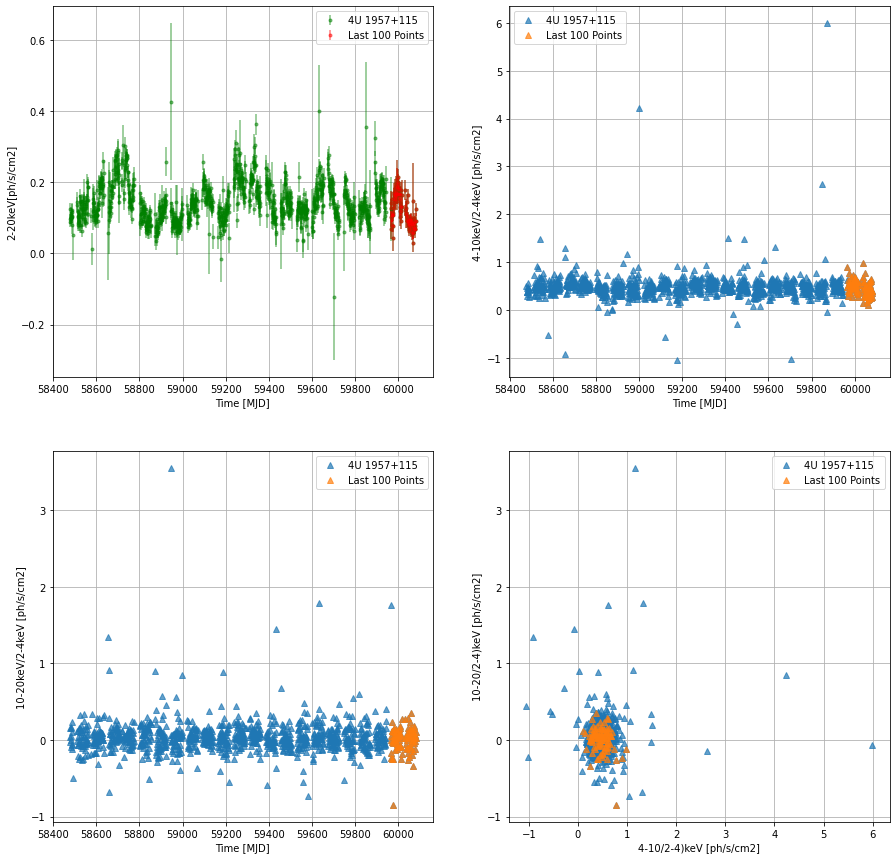

/tmp/ipykernel_29377/1305300589.py:43: RuntimeWarning: divide by zero encountered in true_divide
  r_B1= np.array(error2)/np.array(twofourkeV)
/tmp/ipykernel_29377/1305300589.py:45: RuntimeWarning: divide by zero encountered in true_divide
  div1=fourtenkeV/twofourkeV
/tmp/ipykernel_29377/1305300589.py:48: RuntimeWarning: divide by zero encountered in true_divide
  fourtenvstwofour=(fourtenkeV/twofourkeV)*(r_A1+r_B1)
/tmp/ipykernel_29377/1305300589.py:54: RuntimeWarning: divide by zero encountered in true_divide
  r_B2= np.array(error2)/np.array(twofourkeV)
/tmp/ipykernel_29377/1305300589.py:56: RuntimeWarning: divide by zero encountered in true_divide
  tentwntyvstwofour=(tentwentykeV/twofourkeV)*(r_A2+r_B2)
/tmp/ipykernel_29377/1305300589.py:58: RuntimeWarning: divide by zero encountered in true_divide
  div2=tentwentykeV/twofourkeV


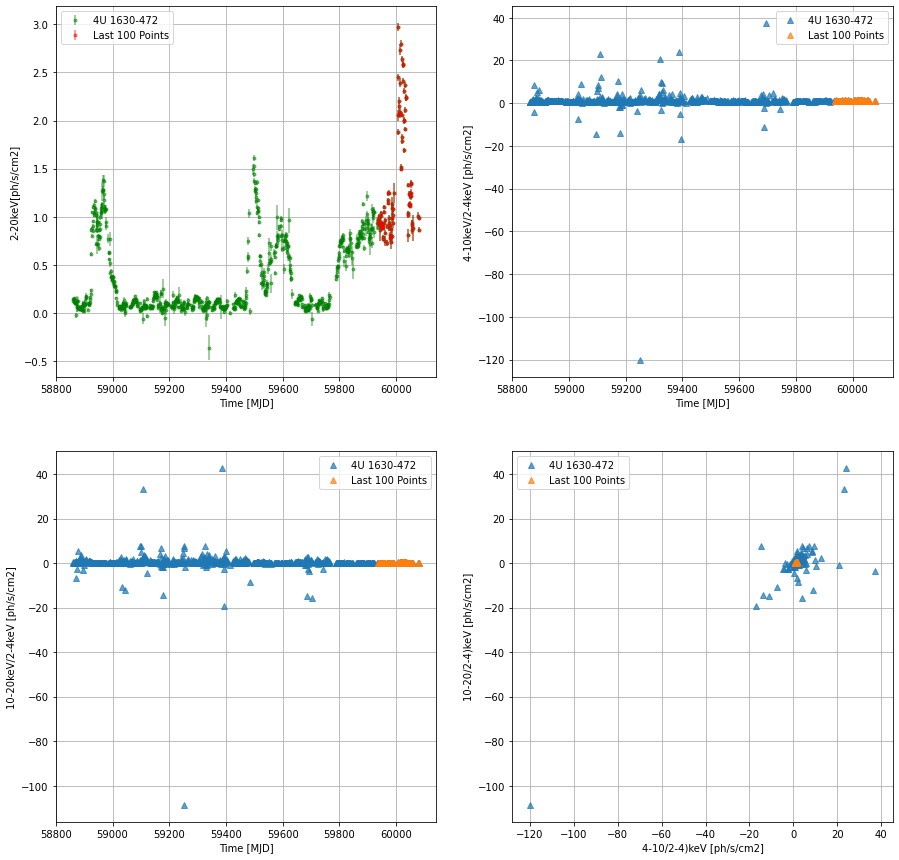

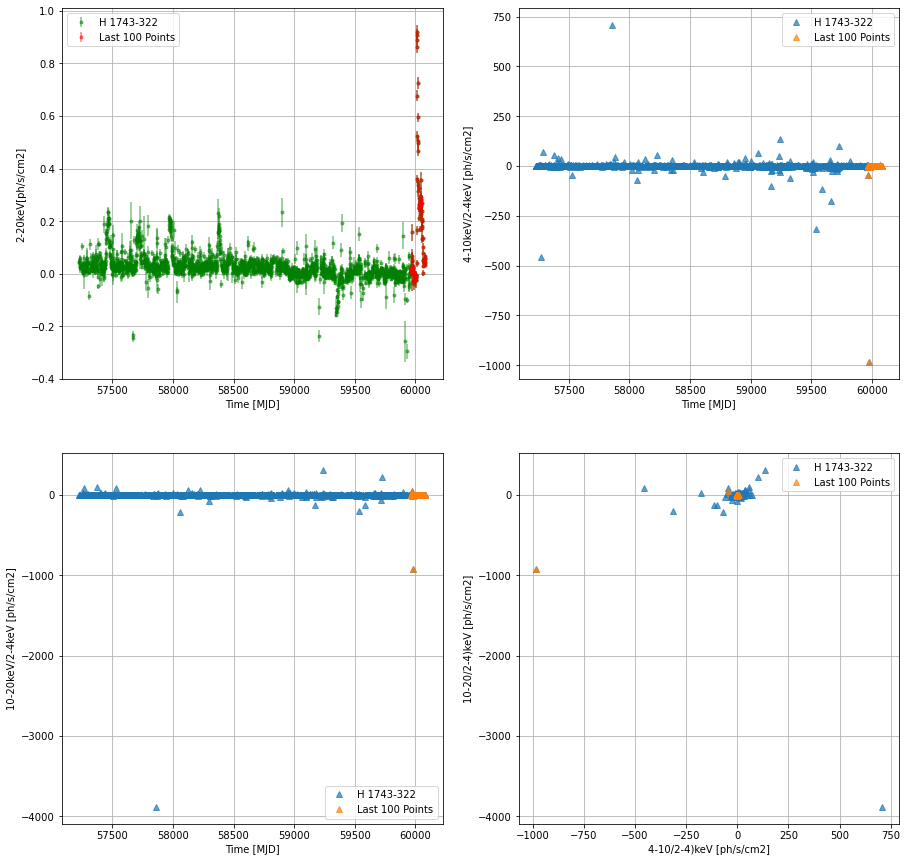

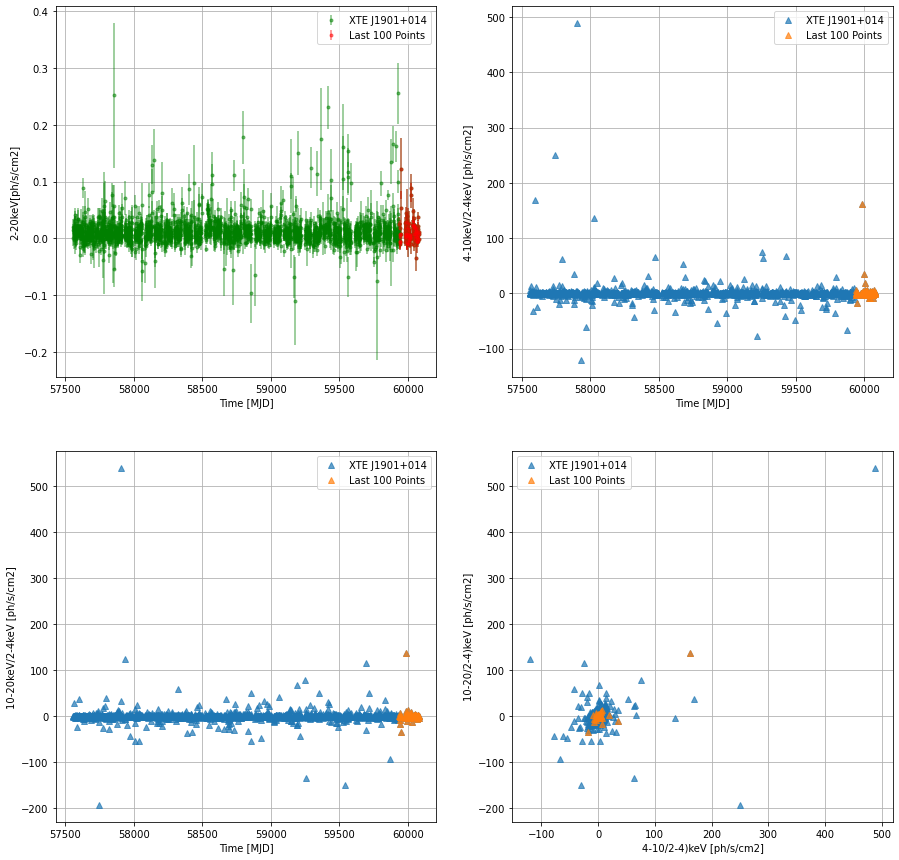

/tmp/ipykernel_29377/1305300589.py:40: RuntimeWarning: divide by zero encountered in true_divide
  r_A1 = np.array(error3)/np.array(fourtenkeV)
/tmp/ipykernel_29377/1305300589.py:48: RuntimeWarning: invalid value encountered in multiply
  fourtenvstwofour=(fourtenkeV/twofourkeV)*(r_A1+r_B1)


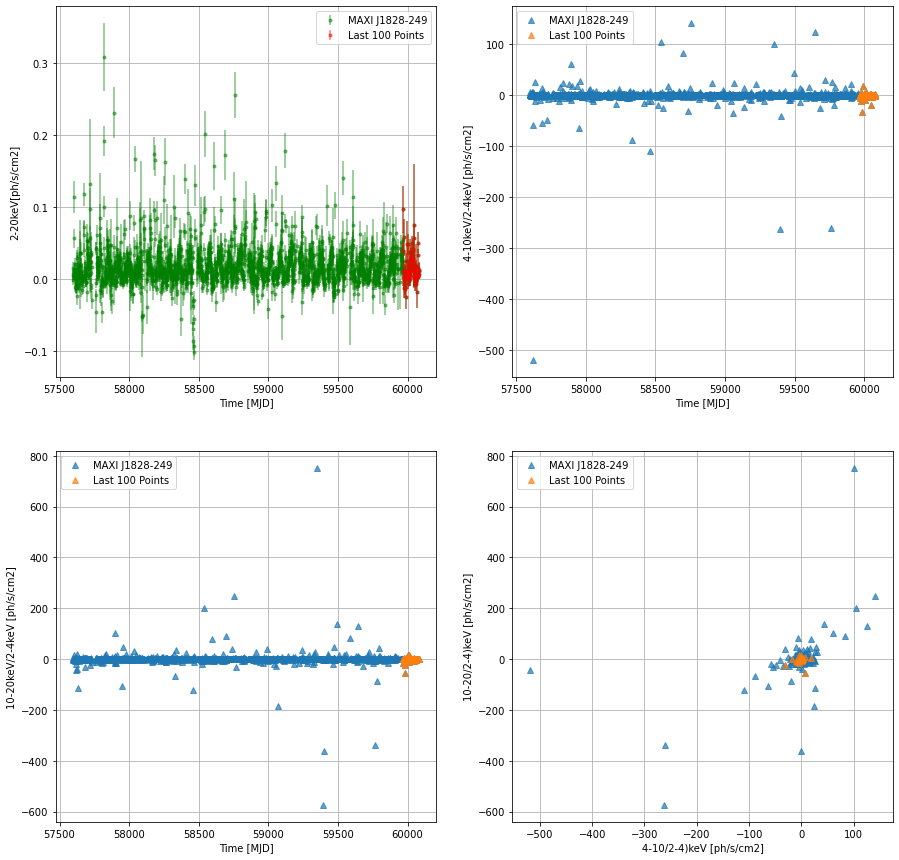

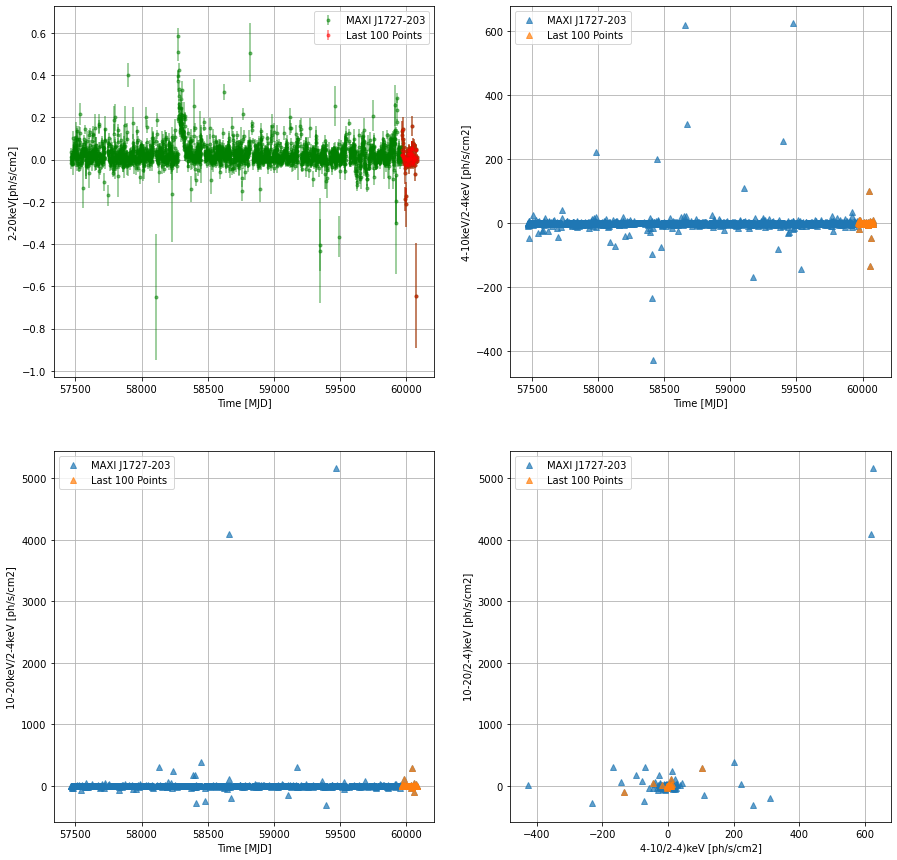

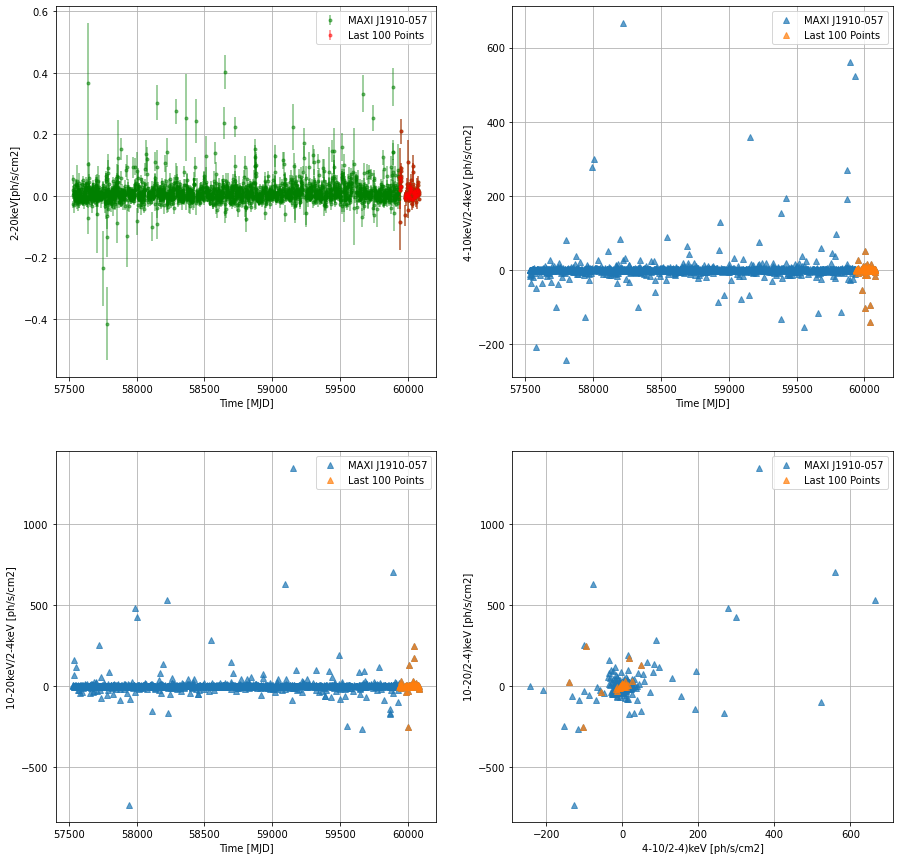

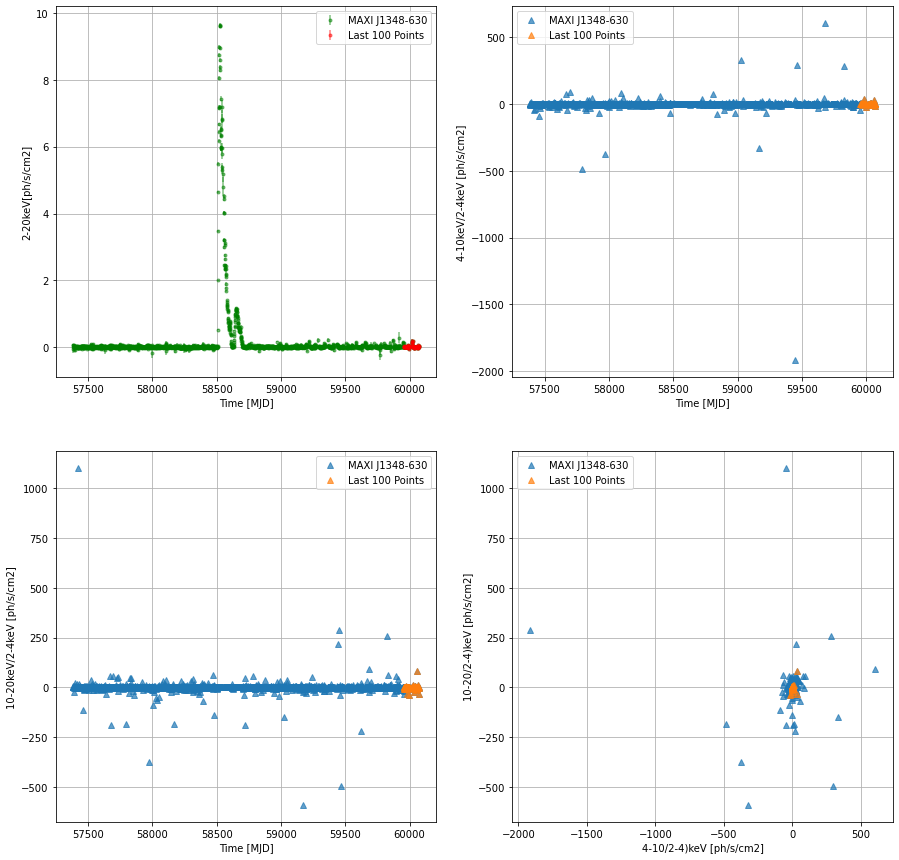

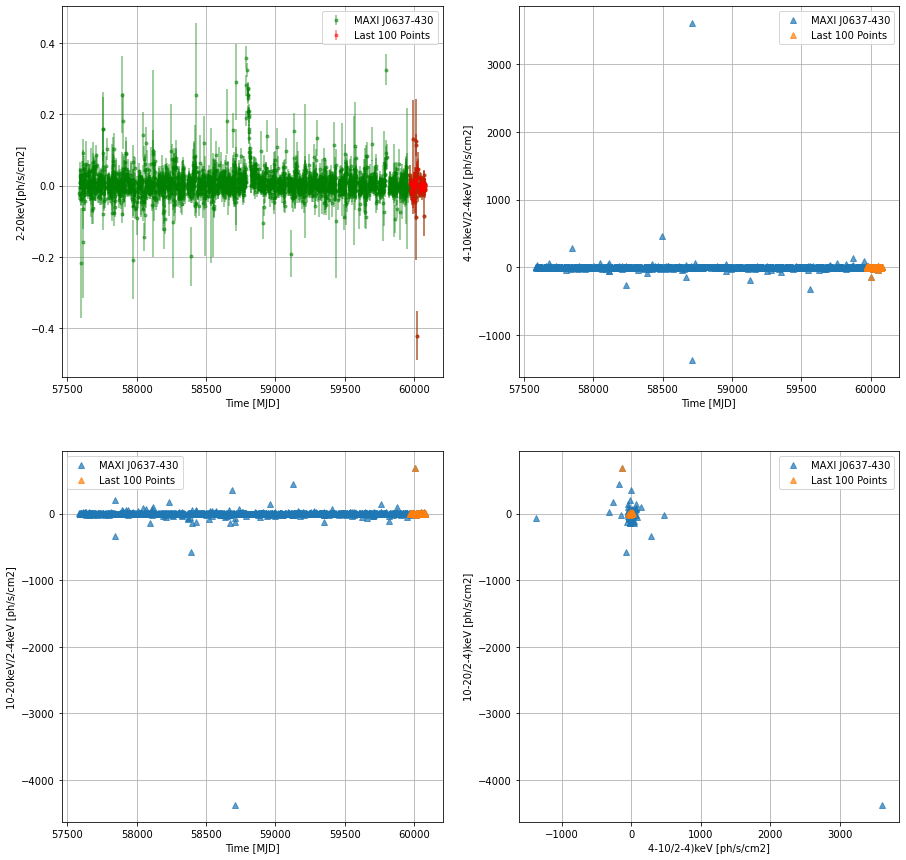

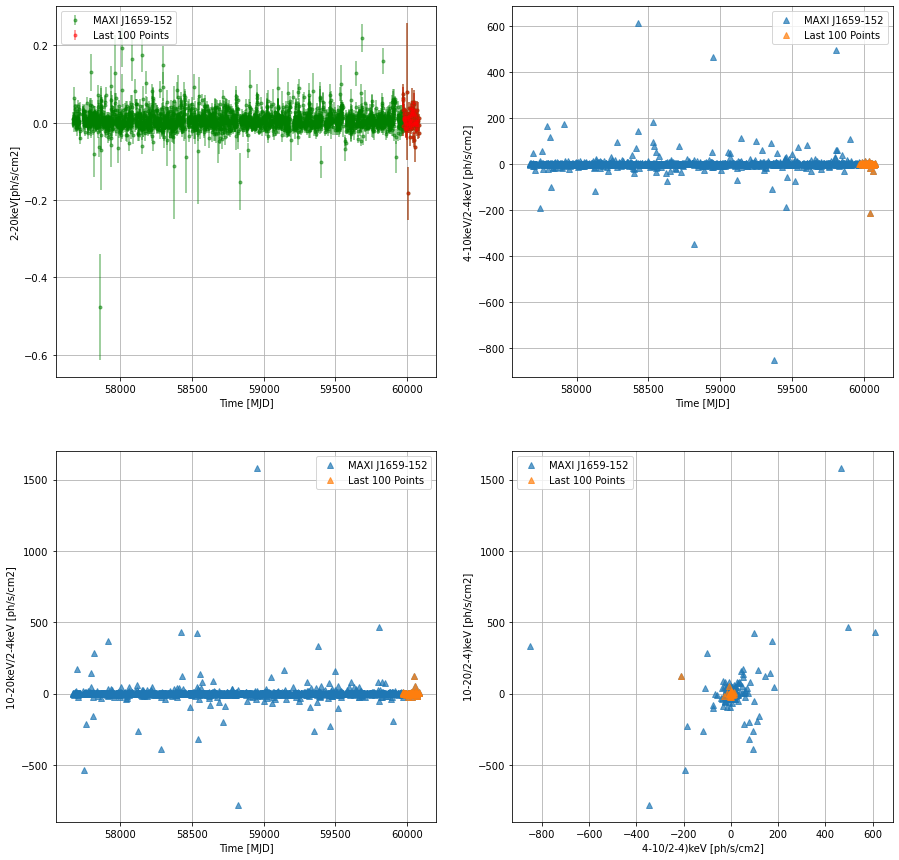

/tmp/ipykernel_29377/1305300589.py:43: RuntimeWarning: invalid value encountered in true_divide
  r_B1= np.array(error2)/np.array(twofourkeV)
/tmp/ipykernel_29377/1305300589.py:54: RuntimeWarning: invalid value encountered in true_divide
  r_B2= np.array(error2)/np.array(twofourkeV)


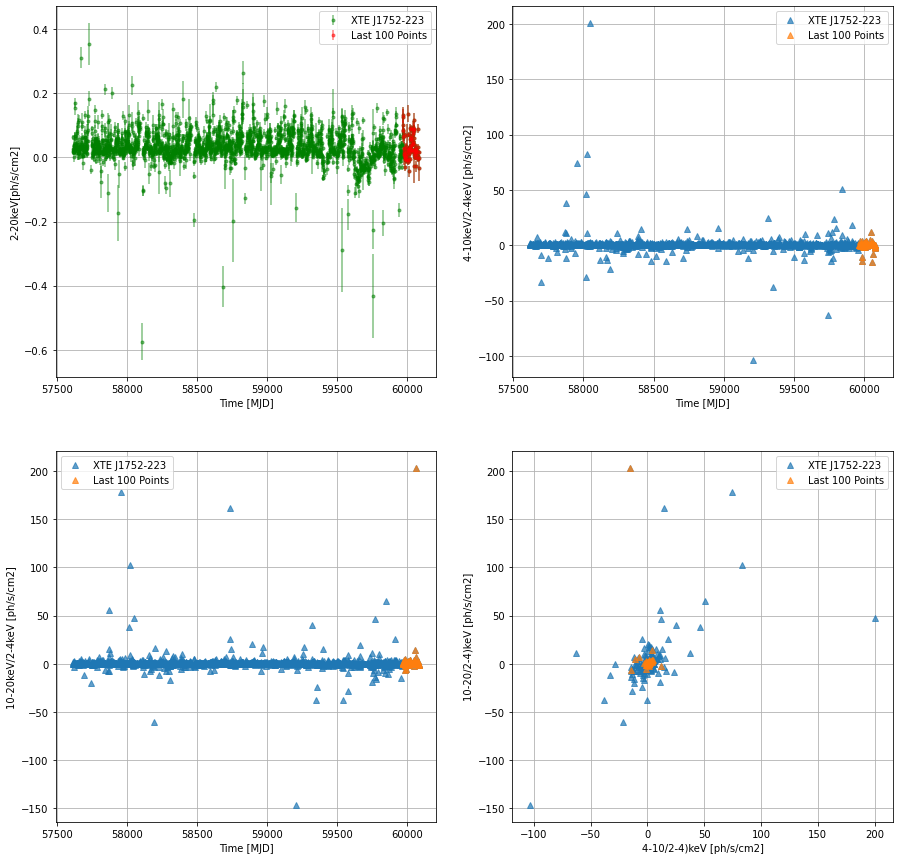

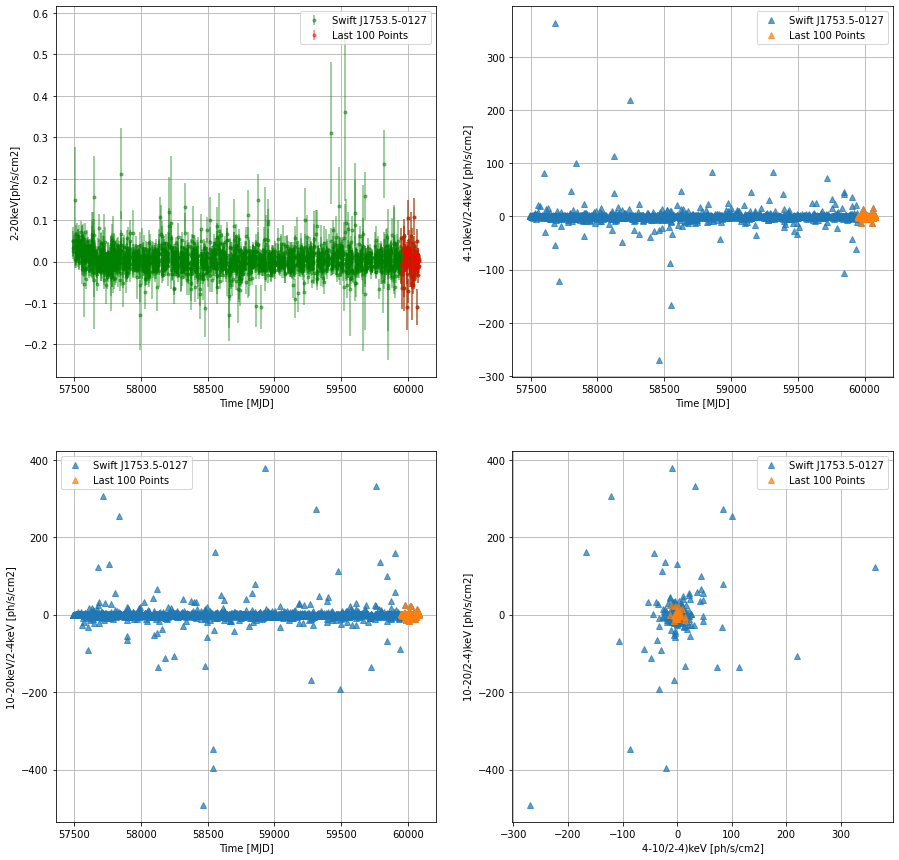

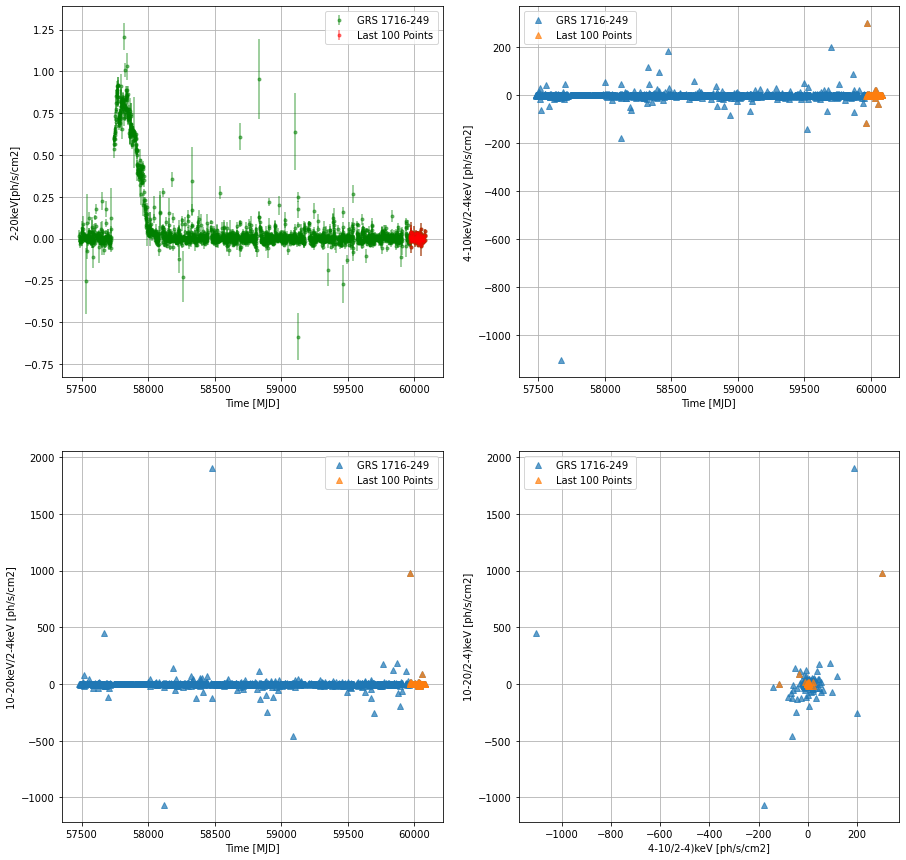

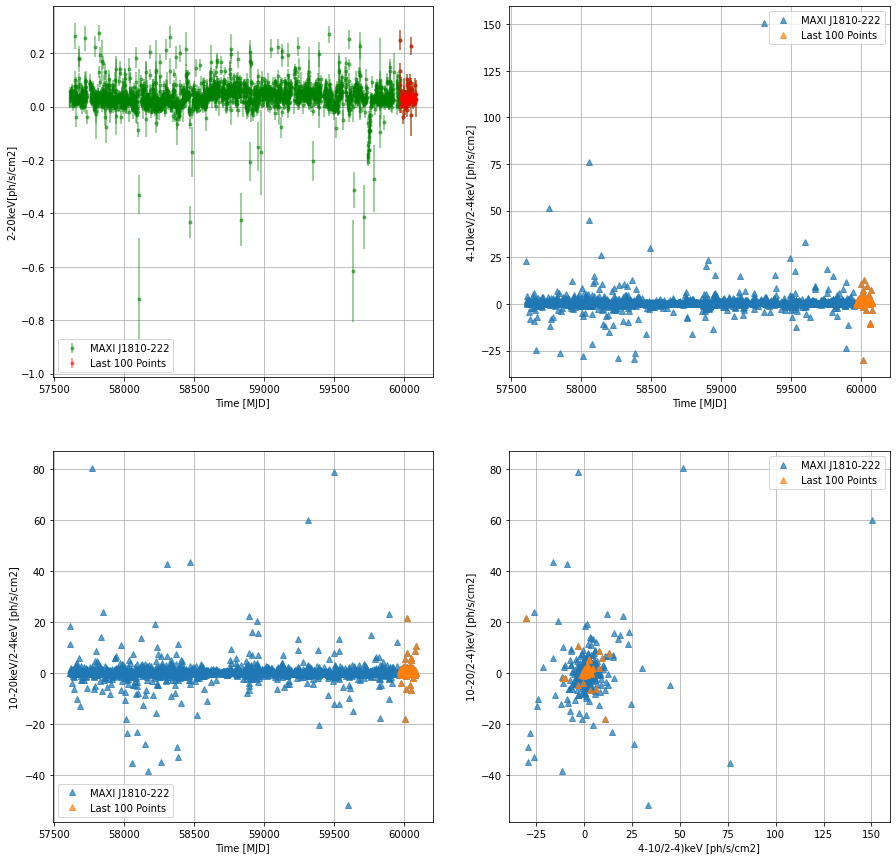

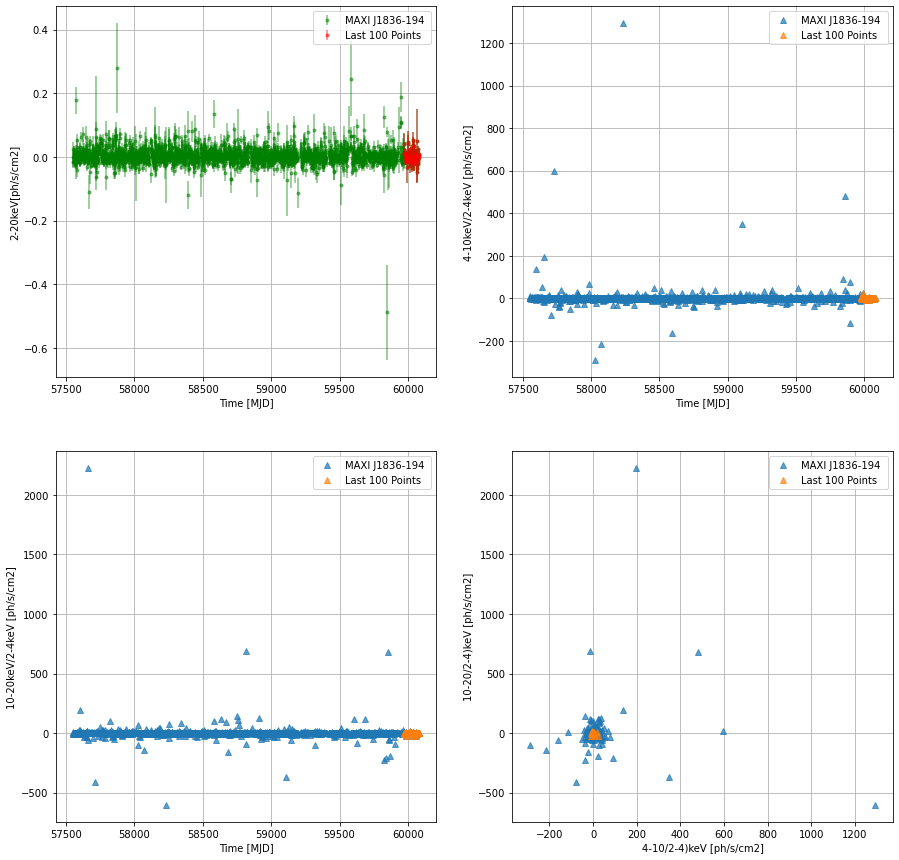

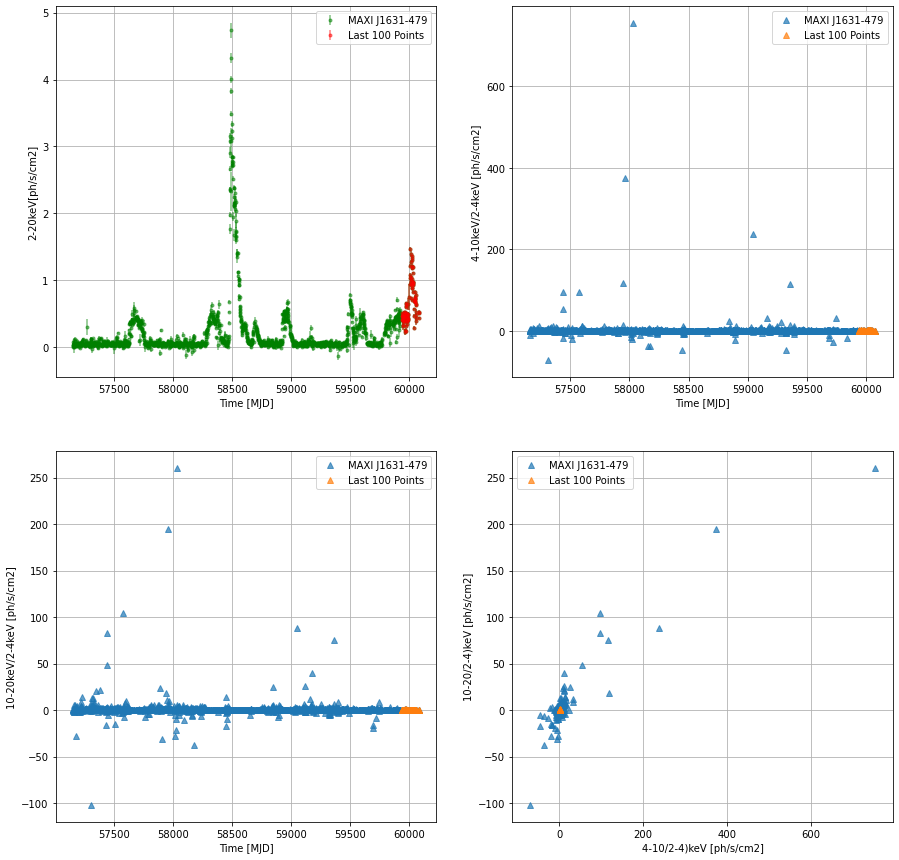

/tmp/ipykernel_29377/1305300589.py:51: RuntimeWarning: divide by zero encountered in true_divide
  r_A2 = np.array(error4)/np.array(tentwentykeV)
/tmp/ipykernel_29377/1305300589.py:56: RuntimeWarning: invalid value encountered in multiply
  tentwntyvstwofour=(tentwentykeV/twofourkeV)*(r_A2+r_B2)


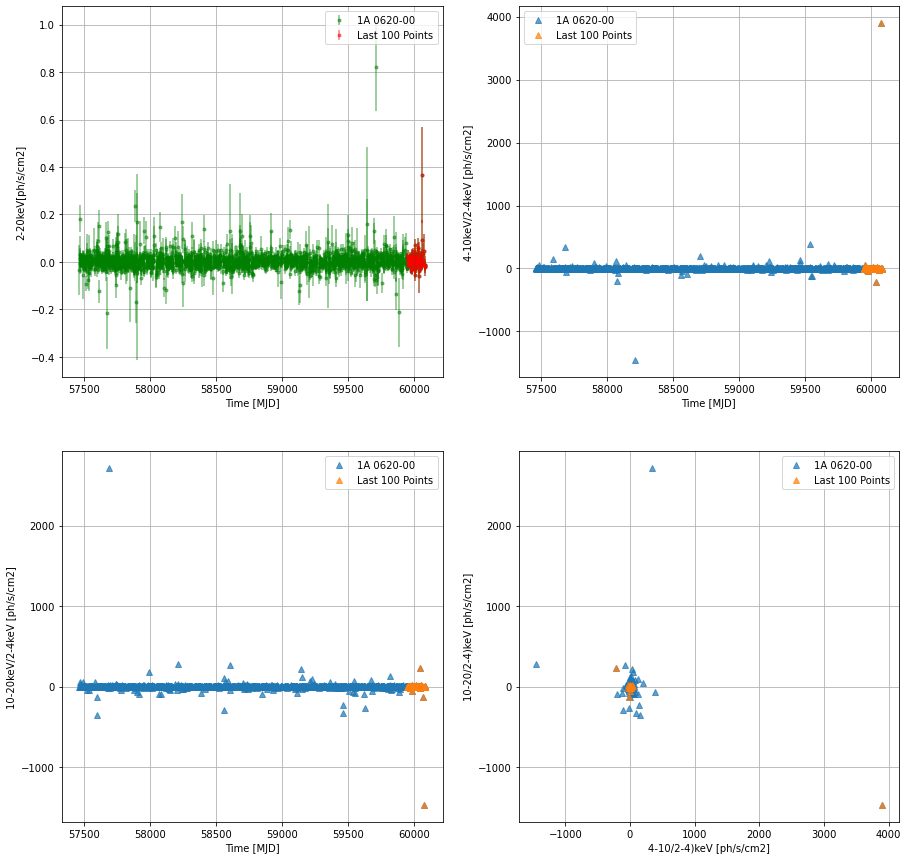

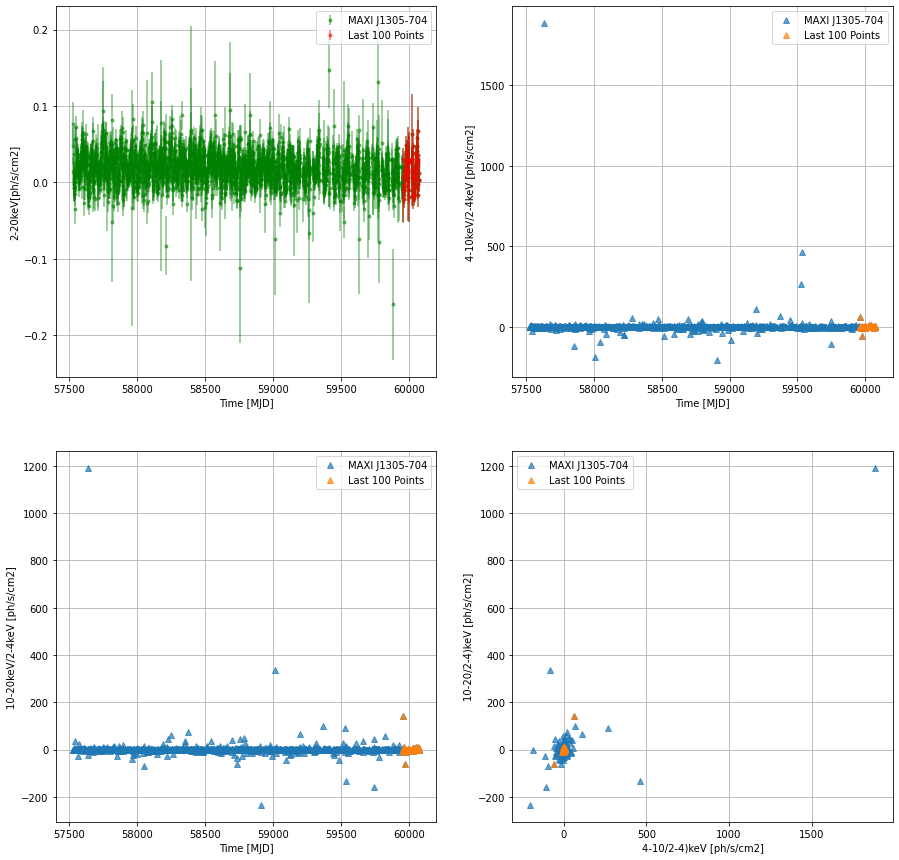

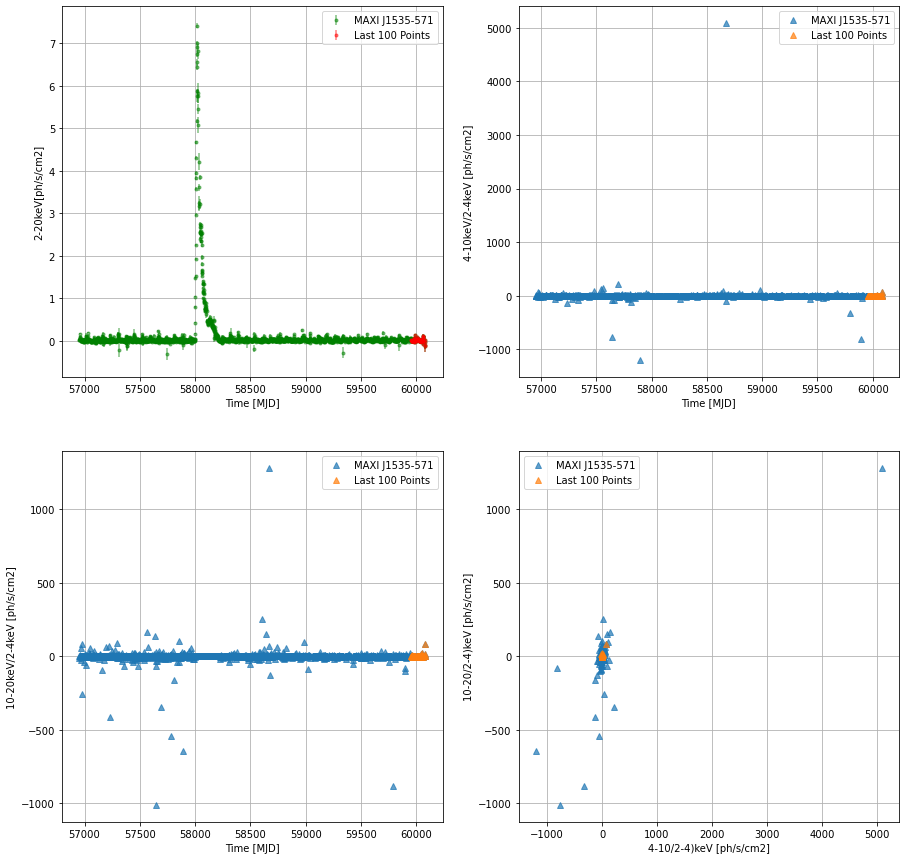

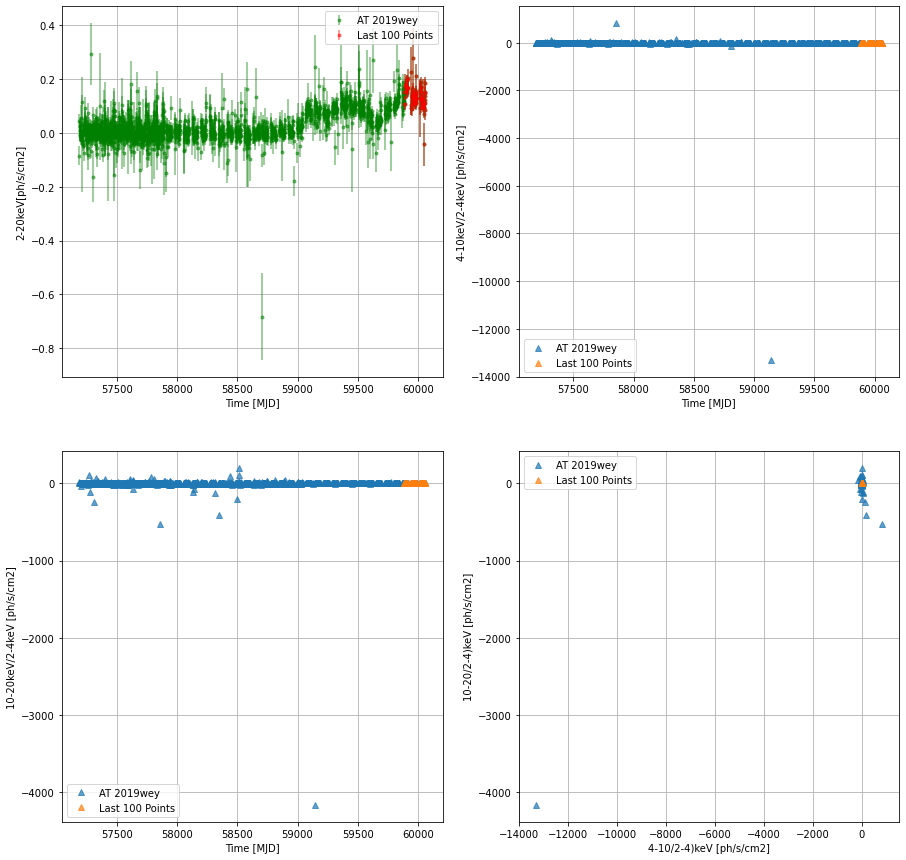

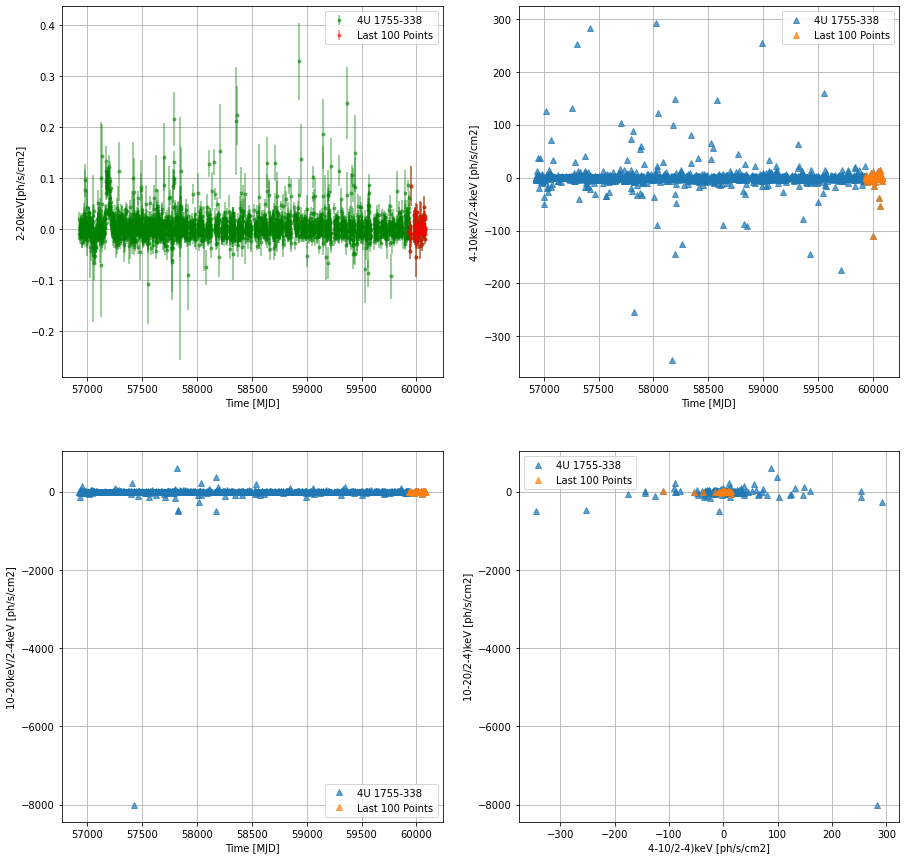

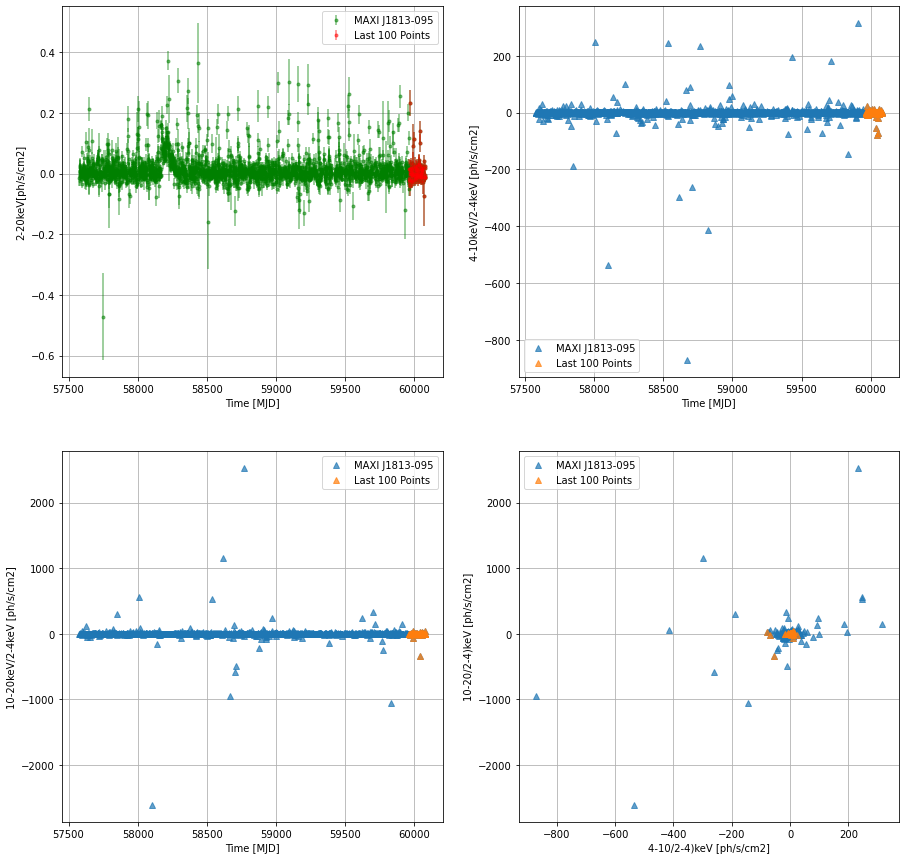

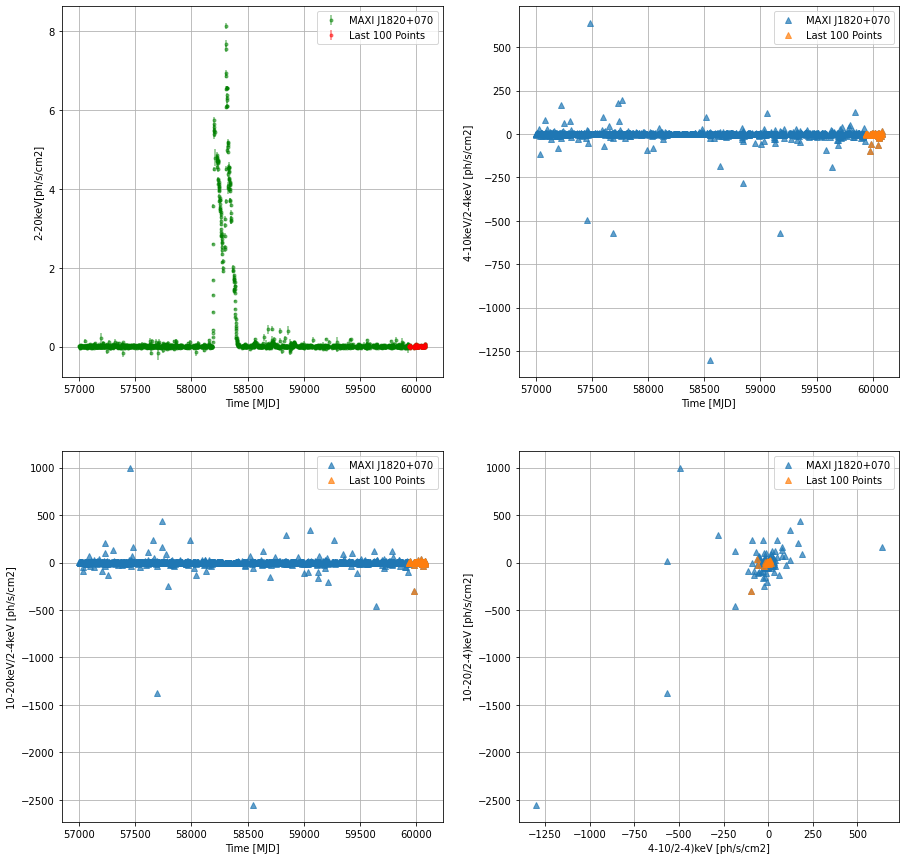

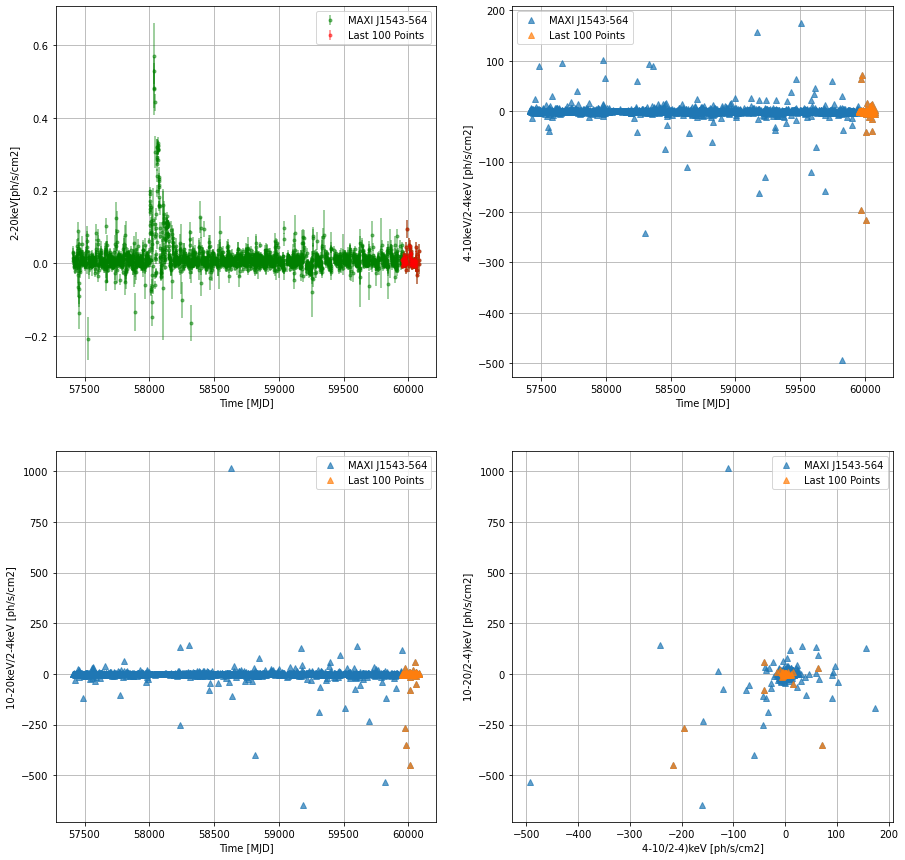

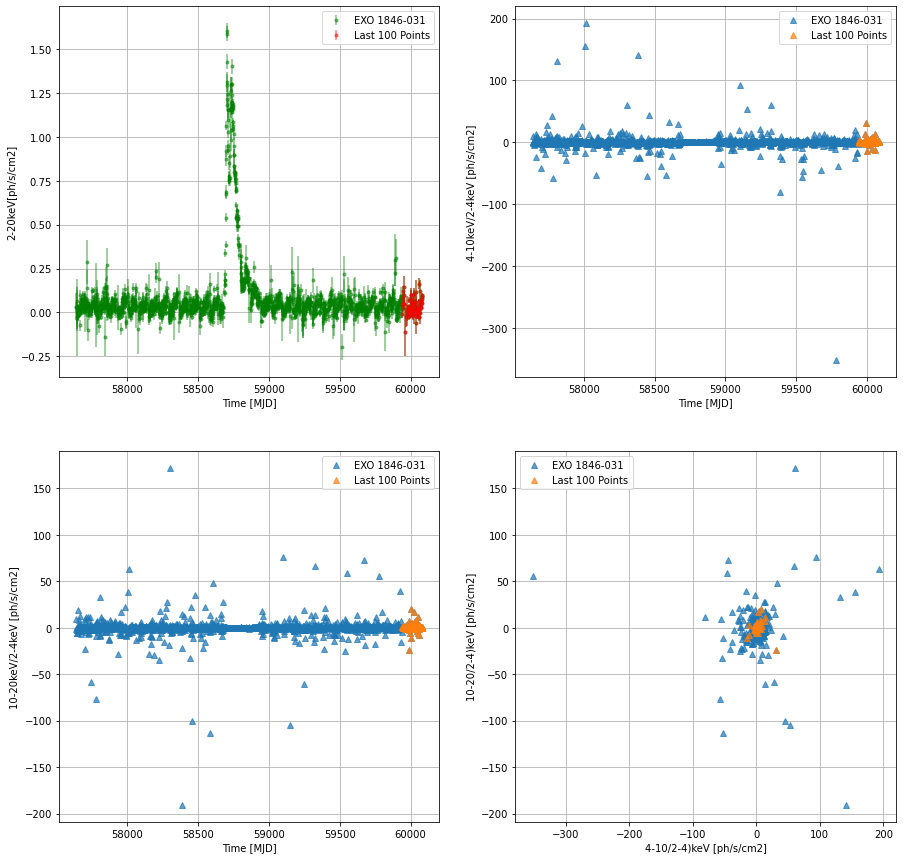

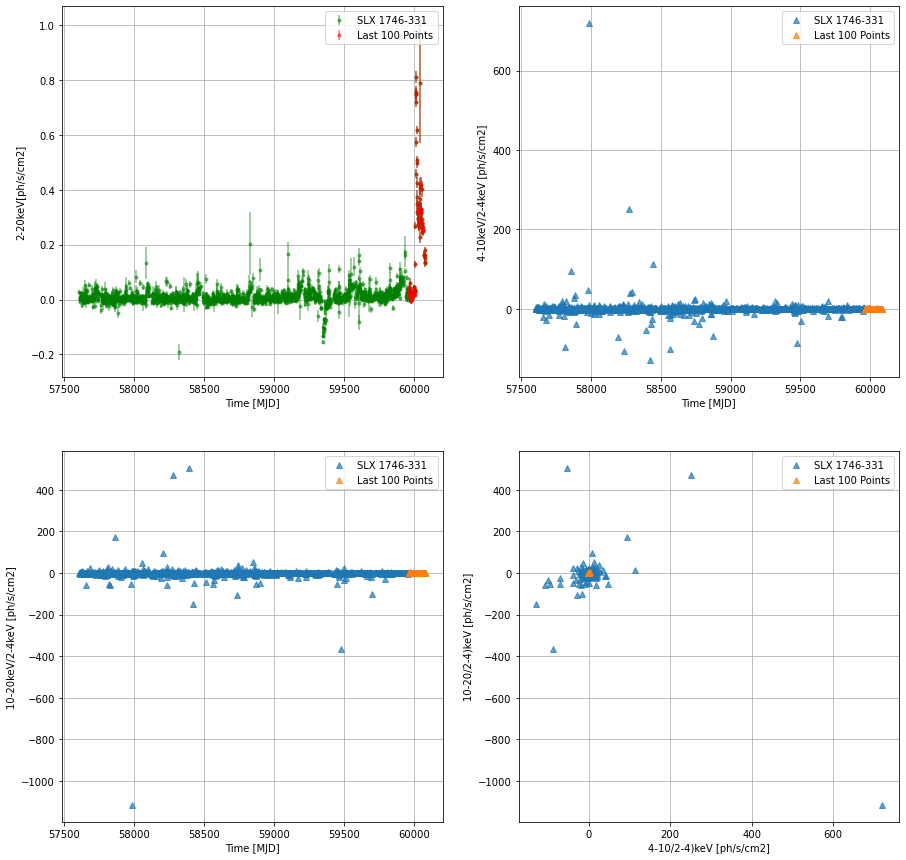

In [2]:
for file_name in csv_files:
    with open(file_name, 'r') as file:
        csvreader = csv.reader(file,delimiter="\t")
        for row in csvreader:
            col1_data = []
            col2_data = []
            col3_data = []
            col4_data = []
            col5_data = []
            col6_data = []
            col7_data = []
            col8_data = []
            col9_data = []
            # Loop through the rows in the CSV file
            for row in csvreader:
                col1_data.append(float(row[0]))
                col2_data.append(float(row[1]))
                col3_data.append(float(row[2]))
                col4_data.append(float(row[3]))
                col5_data.append(float(row[4]))
                col6_data.append(float(row[5])) 
                col7_data.append(float(row[6]))
                col8_data.append(float(row[7]))
                col9_data.append(float(row[8]))
                
                # Extract the file name without the extension
        file_label = os.path.splitext(file_name)[0]
# columns
        MJDcenter = np.array(col1_data)
        twotwentykeV = np.array(col2_data)
        error1 = np.array(col3_data)
        twofourkeV= np.array(col4_data)
        error2= np.array(col5_data)
        fourtenkeV= np.array(col6_data)
        error3= np.array(col7_data)
        tentwentykeV= np.array(col8_data)
        error4= np.array(col9_data)

        # error propagation for 4-10 keV / Time
        r_A1 = np.array(error3)/np.array(fourtenkeV)

        # similarly, the error associated with B
        r_B1= np.array(error2)/np.array(twofourkeV)

        div1=fourtenkeV/twofourkeV

        # error propagation
        fourtenvstwofour=(fourtenkeV/twofourkeV)*(r_A1+r_B1)

        # error associated with A
        r_A2 = np.array(error4)/np.array(tentwentykeV)

        # similarly, the error associated with B
        r_B2= np.array(error2)/np.array(twofourkeV)
        # error propagation
        tentwntyvstwofour=(tentwentykeV/twofourkeV)*(r_A2+r_B2)

        div2=tentwentykeV/twofourkeV
        
        
        #minimum
        # Calculate the minimum and maximum values of your data arrays
        x_min = min(np.min(MJDcenter), np.min(div1), np.min(div2))
        x_max = max(np.max(MJDcenter), np.max(div1), np.max(div2))
        y_min = min(np.min(twotwentykeV), np.min(div1), np.min(div2))
        y_max = max(np.max(twotwentykeV), np.max(div1), np.max(div2))
        
       # Calculate the indices for the last 100 points
        last_100_indices = range(len(MJDcenter) - 100, len(MJDcenter))
    
    # Extract the last 100 points
        last_100_MJDcenter = MJDcenter[last_100_indices]
        last_100_twotwentykeV = twotwentykeV[last_100_indices]
        last_100_error1 = error1[last_100_indices]
        last_100_div1 = div1[last_100_indices]
        last_100_div2 = div2[last_100_indices]

    


        # plotting the results 
        fig = plt.figure(figsize=(15, 15))
        
        plt.subplot(2, 2, 1)
        plt.title
        plt.errorbar(MJDcenter,twotwentykeV, yerr=error1,fmt='.g', alpha = 0.5,label=file_label );
        plt.errorbar(last_100_MJDcenter, last_100_twotwentykeV, yerr=last_100_error1, fmt='.r', alpha=0.5, label='Last 100 Points')

        plt.xlabel('Time [MJD]')
        plt.ylabel('2-20keV[ph/s/cm2]')
        plt.title('')
        plt.legend()
        plt.grid()

        plt.subplot(2, 2, 2)
        plt.plot(MJDcenter,div1,'^', alpha = 0.7,label=file_label)
        plt.plot(last_100_MJDcenter, last_100_div1, '^', alpha=0.7, label='Last 100 Points')

        plt.xlabel('Time [MJD]')
        plt.ylabel('4-10keV/2-4keV [ph/s/cm2]')
        
        plt.title('')
        #plt.errorbar(MJDcenter,fourtenvstwofour, yerr=error1, fmt='.k', alpha = 0.5);
        plt.legend()
        plt.grid()


        plt.subplot(2, 2, 3)
        plt.plot(MJDcenter,div2,'^', alpha = 0.7,label=file_label)
        plt.plot(last_100_MJDcenter, last_100_div2, '^', alpha=0.7, label='Last 100 Points')
        plt.xlabel('Time [MJD]')
        plt.ylabel('10-20keV/2-4keV [ph/s/cm2]')
        
        plt.title('')
        plt.legend()
        plt.grid()

        plt.subplot(2, 2, 4)
        plt.plot(div1,div2,'^', alpha = 0.7,label=file_label)
        plt.plot(last_100_div1, last_100_div2, '^', alpha=0.7, label='Last 100 Points')

        plt.xlabel('4-10/2-4)keV [ph/s/cm2]')
        plt.ylabel('10-20/2-4)keV [ph/s/cm2]')
        
        plt.title('')
        plt.legend()
        plt.grid()
       # plt.savefig('catalog_variability.pdf',dpi=1000)
        plt.show()


# last 100 days activities

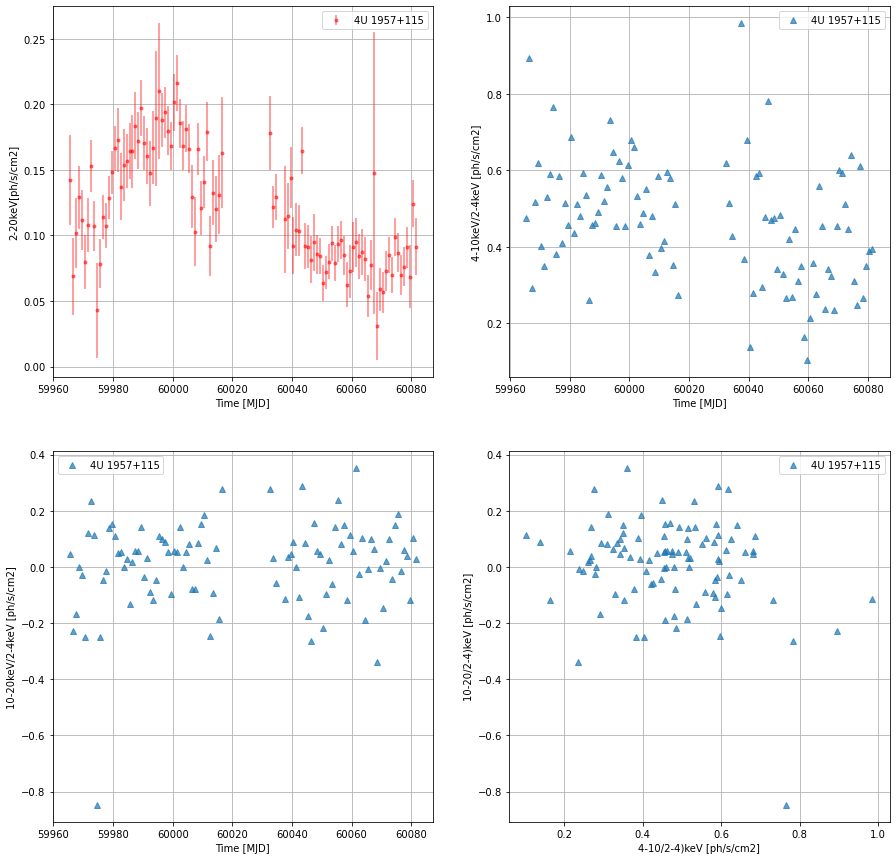

/tmp/ipykernel_29377/1726771978.py:43: RuntimeWarning: divide by zero encountered in true_divide
  r_B1= np.array(error2)/np.array(twofourkeV)
/tmp/ipykernel_29377/1726771978.py:45: RuntimeWarning: divide by zero encountered in true_divide
  div1=fourtenkeV/twofourkeV
/tmp/ipykernel_29377/1726771978.py:48: RuntimeWarning: divide by zero encountered in true_divide
  fourtenvstwofour=(fourtenkeV/twofourkeV)*(r_A1+r_B1)
/tmp/ipykernel_29377/1726771978.py:54: RuntimeWarning: divide by zero encountered in true_divide
  r_B2= np.array(error2)/np.array(twofourkeV)
/tmp/ipykernel_29377/1726771978.py:56: RuntimeWarning: divide by zero encountered in true_divide
  tentwntyvstwofour=(tentwentykeV/twofourkeV)*(r_A2+r_B2)
/tmp/ipykernel_29377/1726771978.py:58: RuntimeWarning: divide by zero encountered in true_divide
  div2=tentwentykeV/twofourkeV


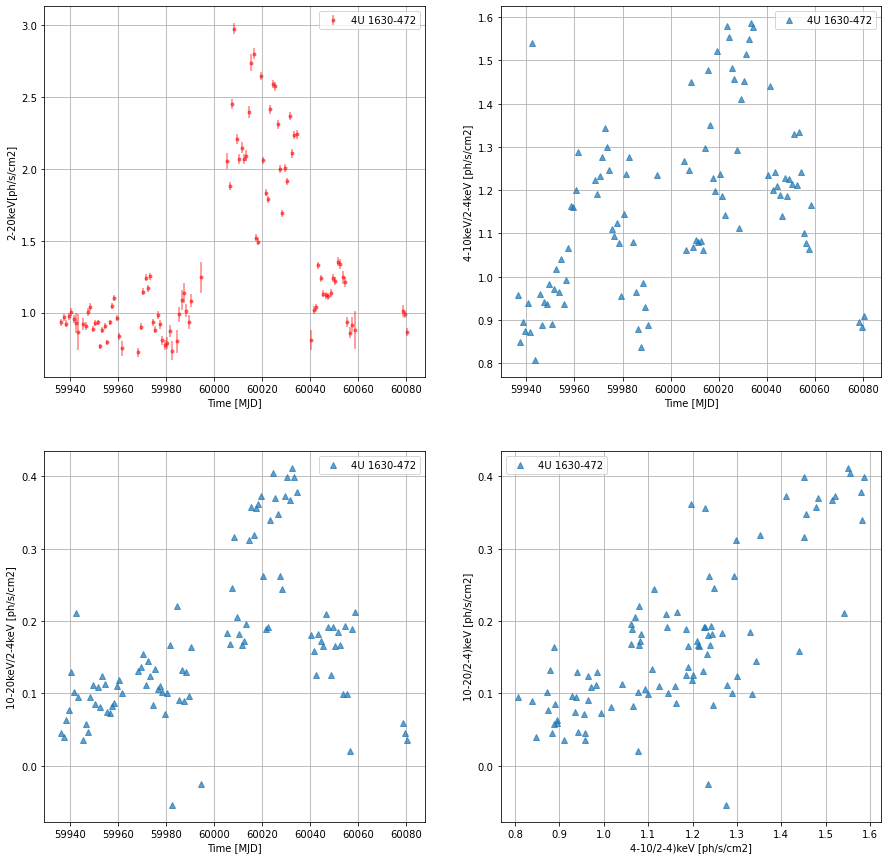

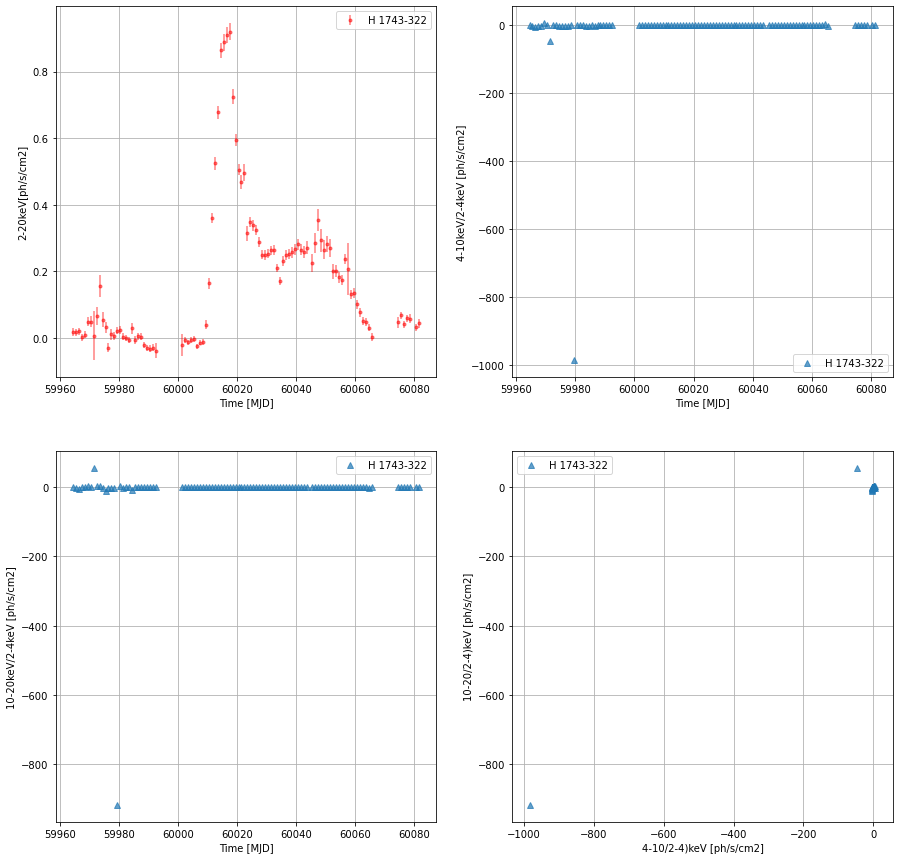

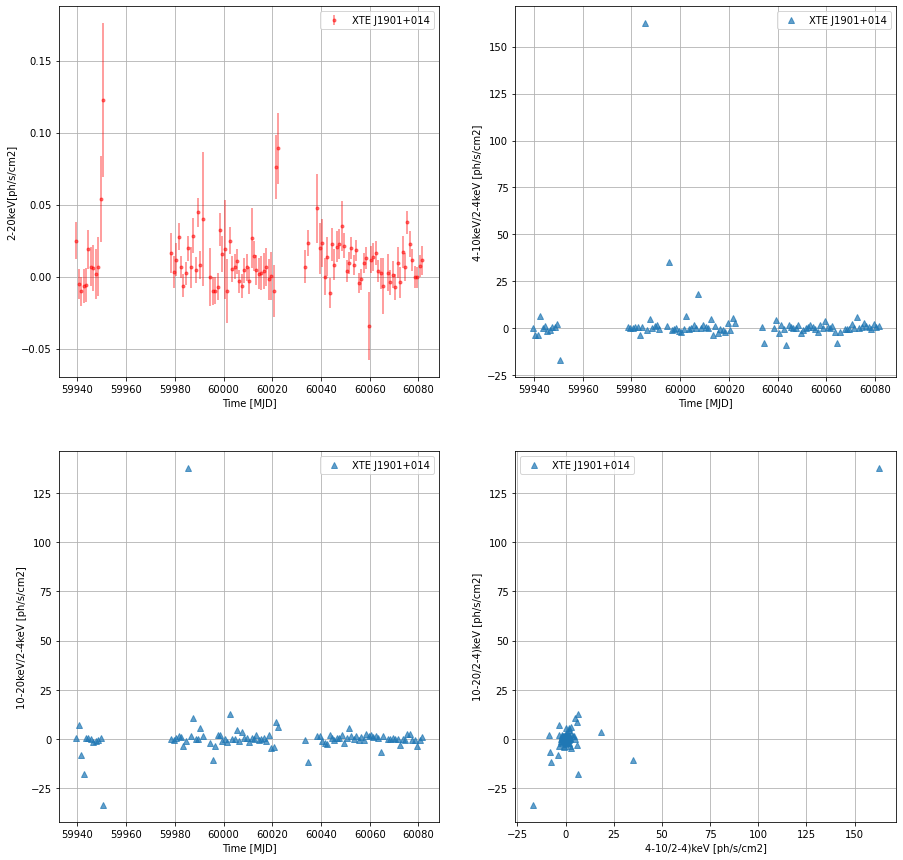

/tmp/ipykernel_29377/1726771978.py:40: RuntimeWarning: divide by zero encountered in true_divide
  r_A1 = np.array(error3)/np.array(fourtenkeV)
/tmp/ipykernel_29377/1726771978.py:48: RuntimeWarning: invalid value encountered in multiply
  fourtenvstwofour=(fourtenkeV/twofourkeV)*(r_A1+r_B1)


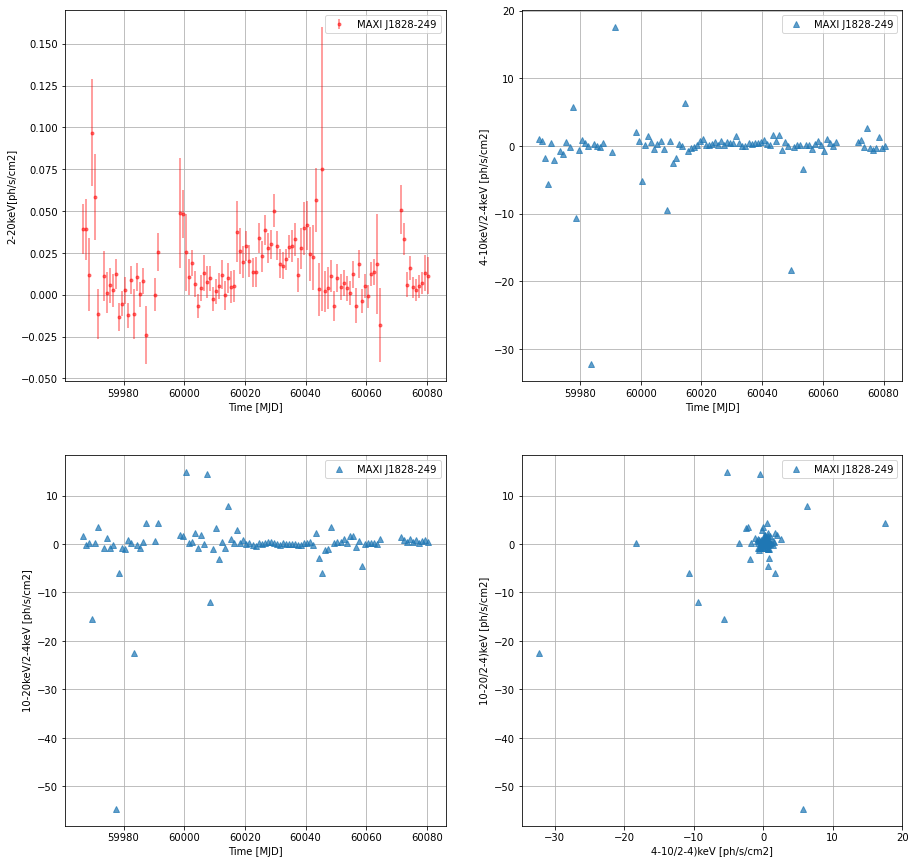

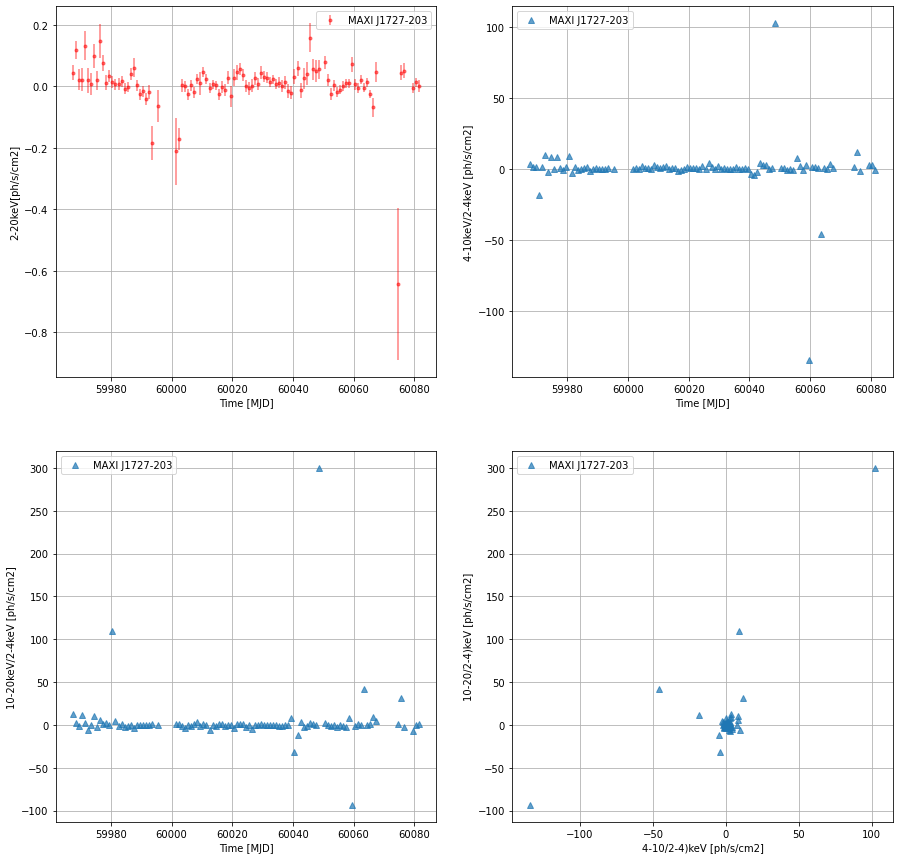

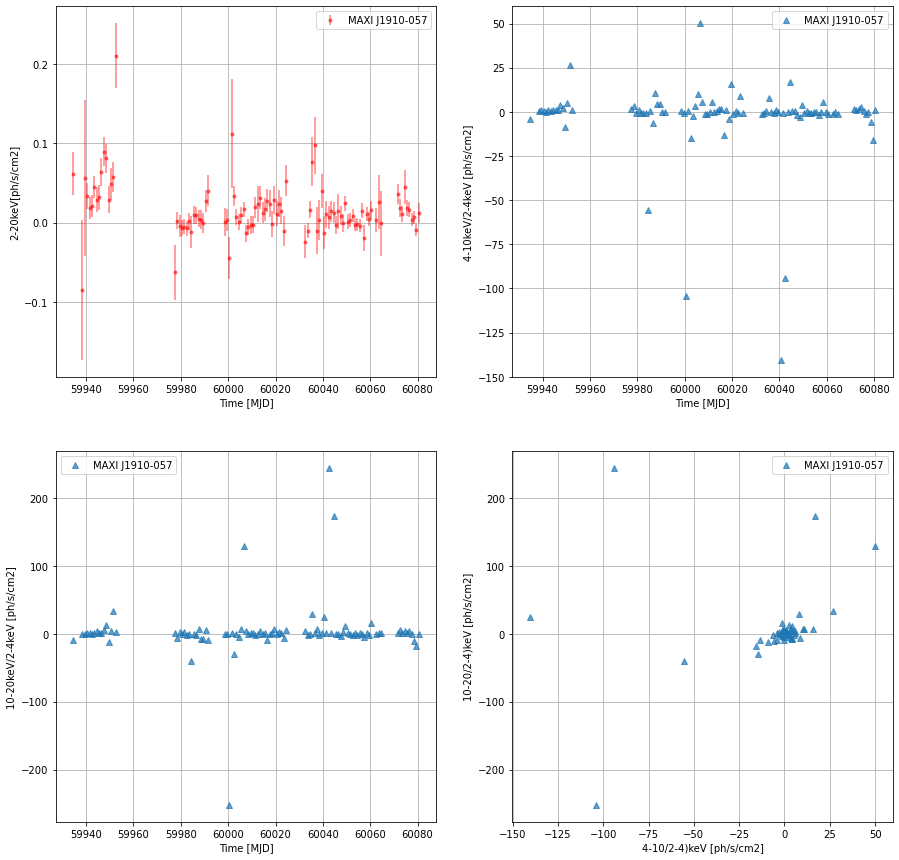

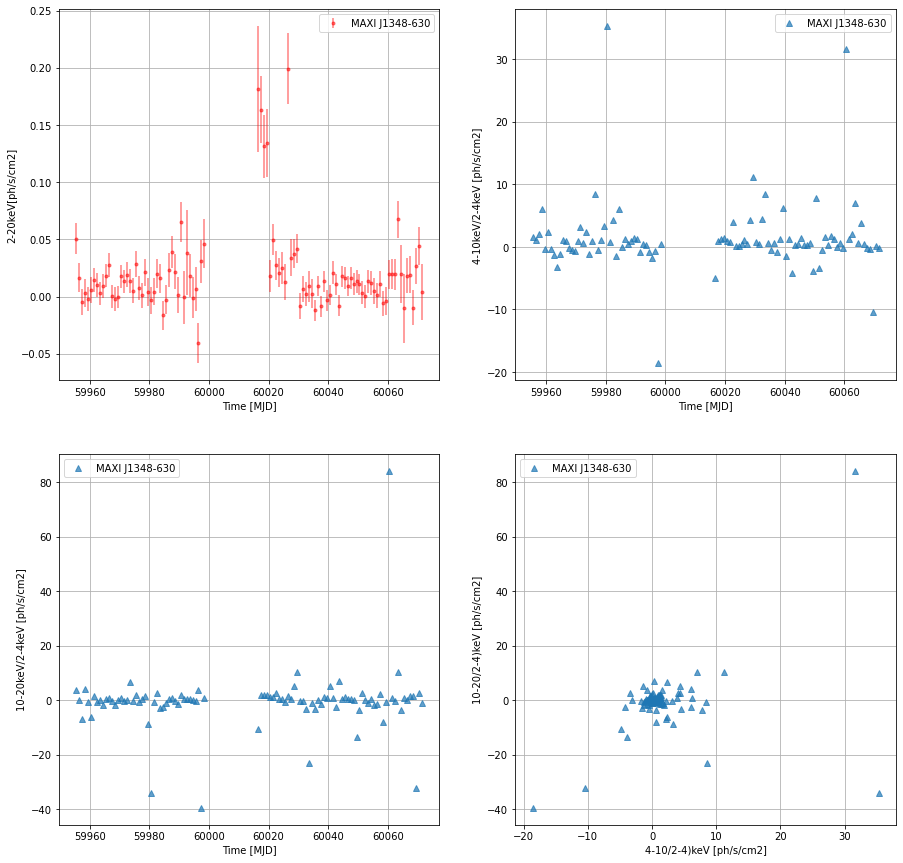

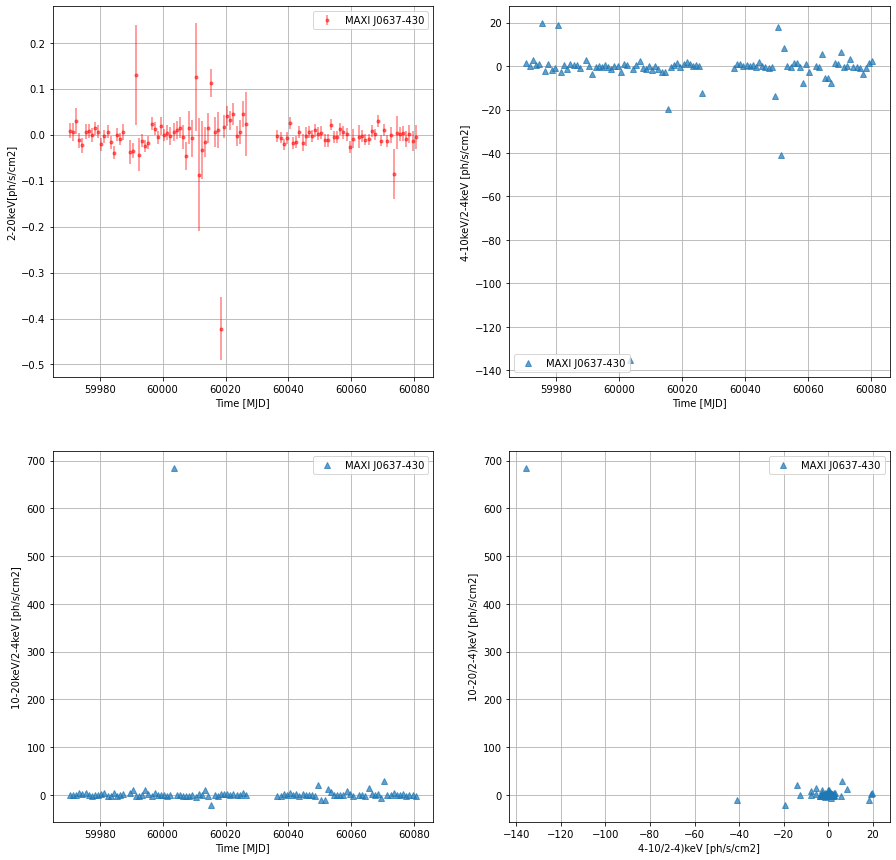

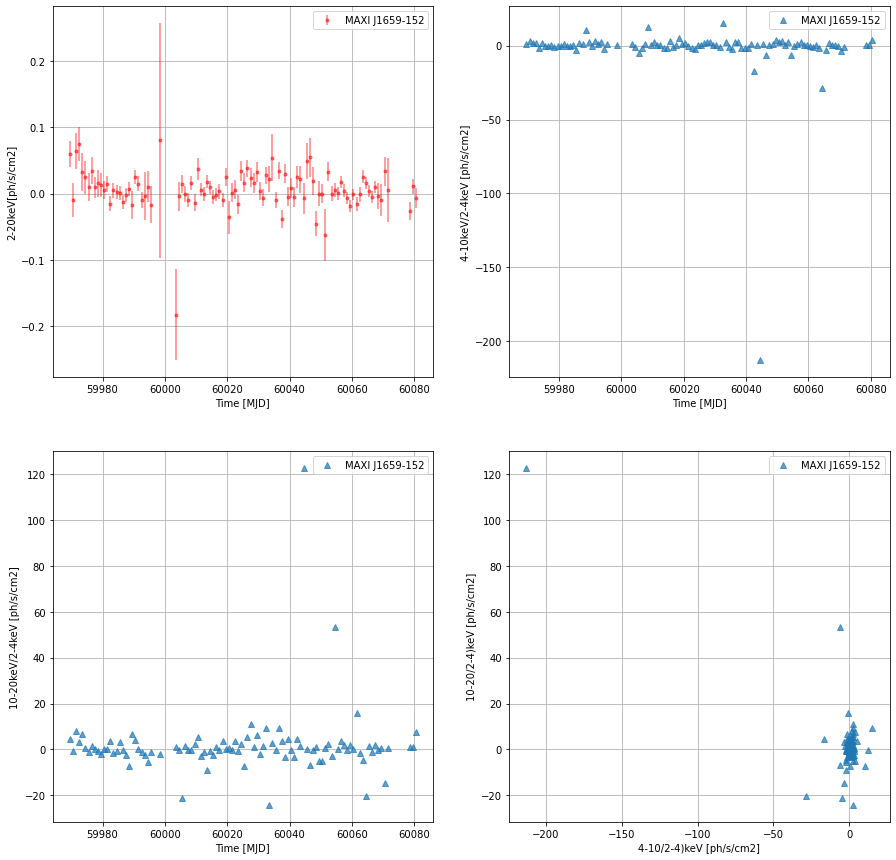

/tmp/ipykernel_29377/1726771978.py:43: RuntimeWarning: invalid value encountered in true_divide
  r_B1= np.array(error2)/np.array(twofourkeV)
/tmp/ipykernel_29377/1726771978.py:54: RuntimeWarning: invalid value encountered in true_divide
  r_B2= np.array(error2)/np.array(twofourkeV)


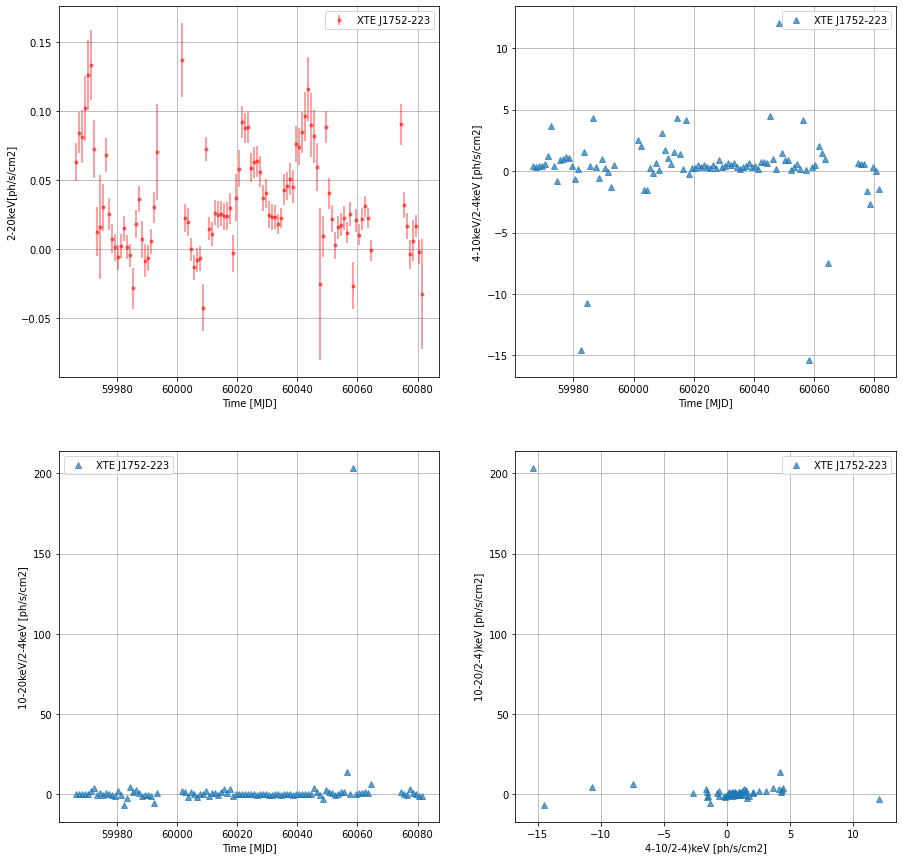

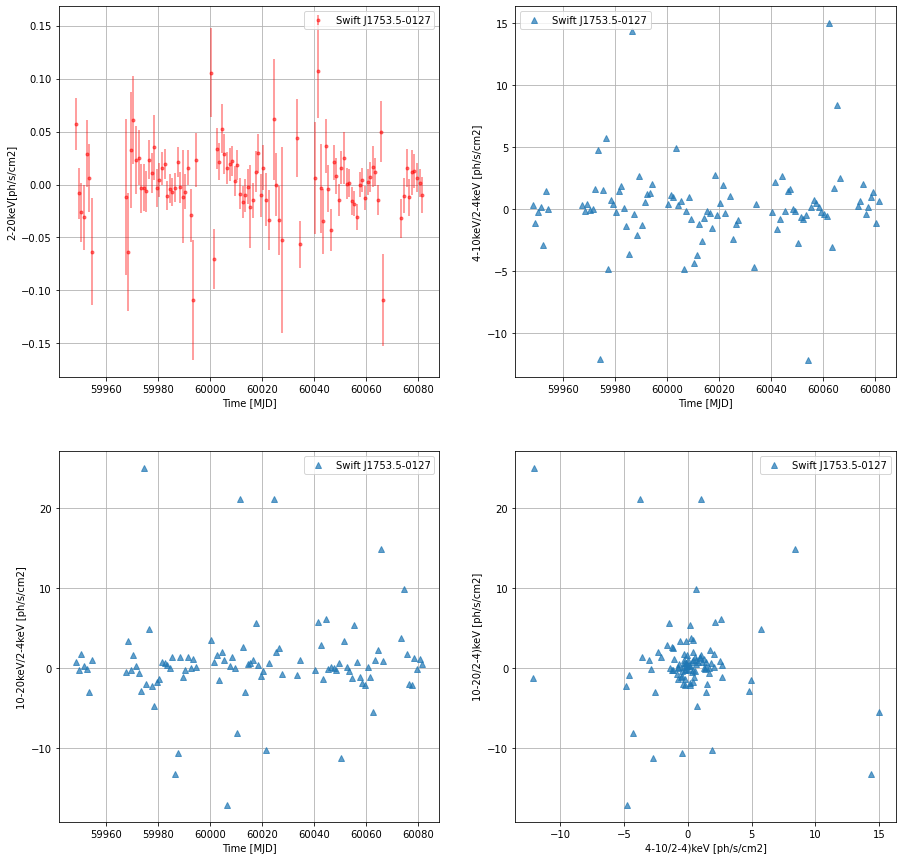

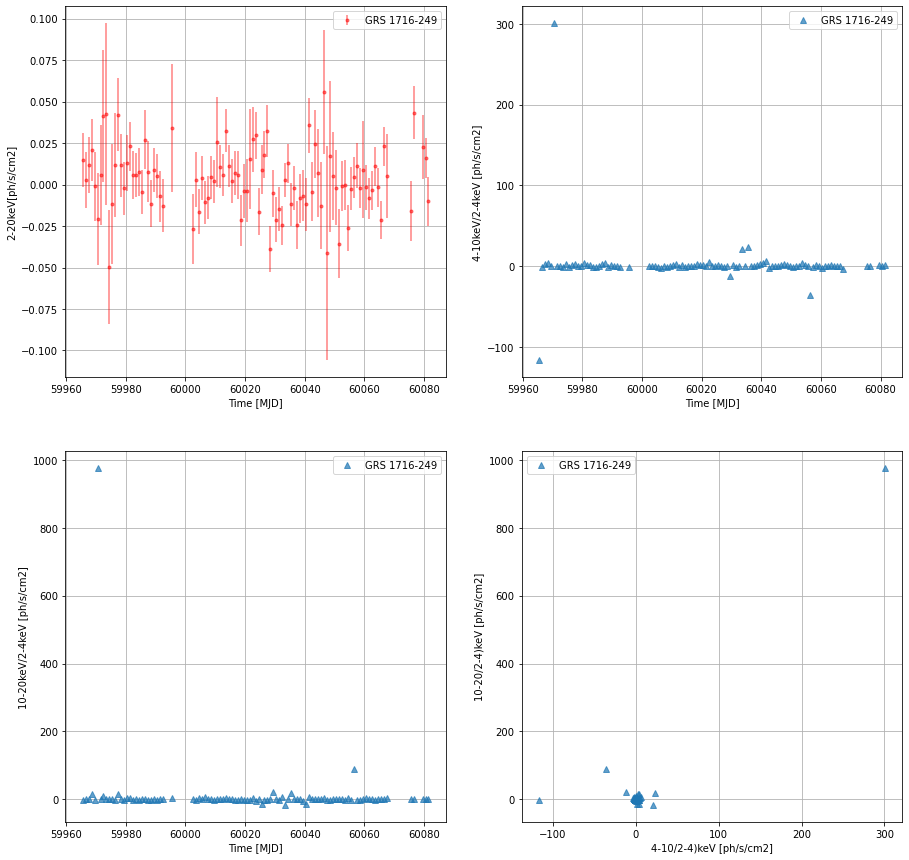

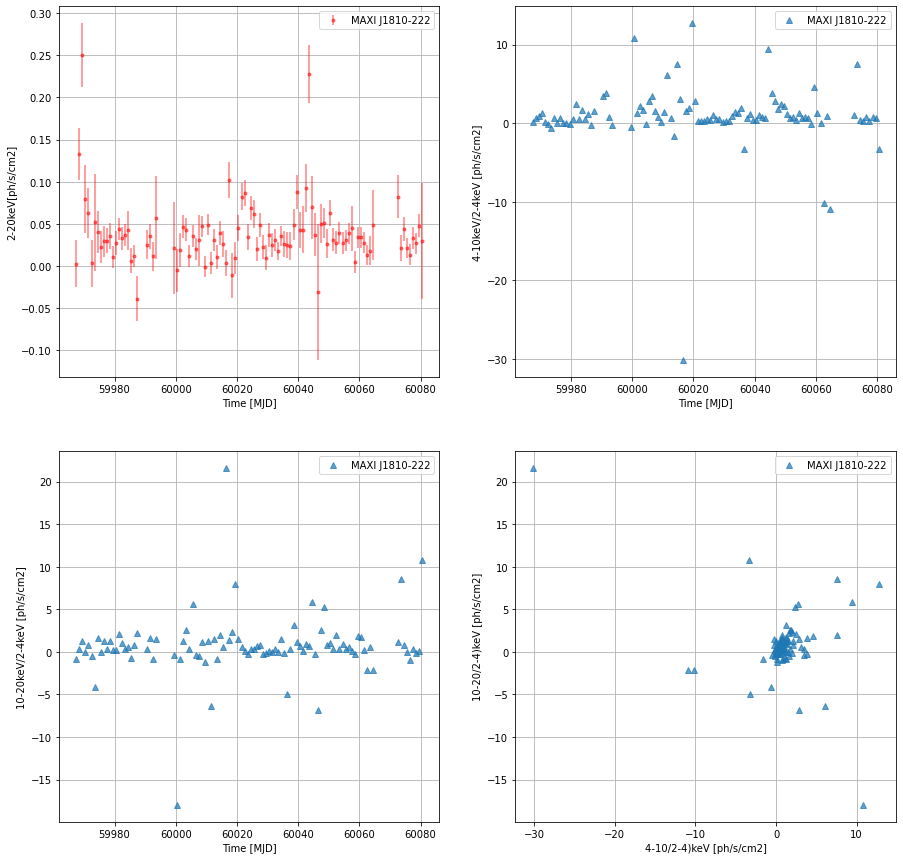

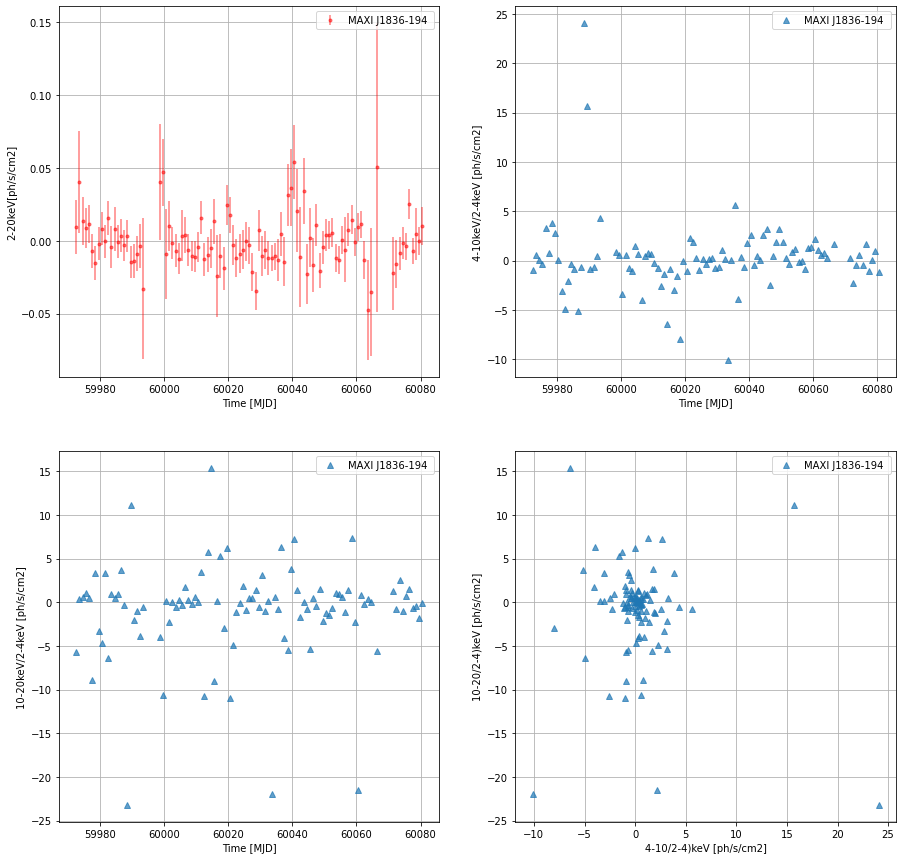

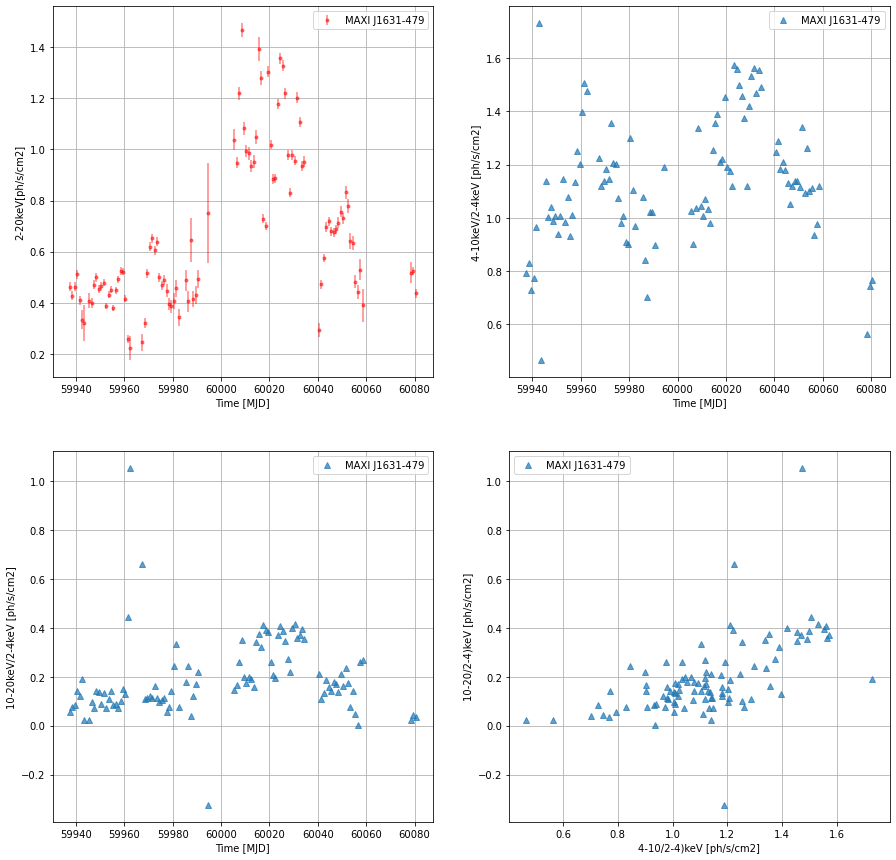

/tmp/ipykernel_29377/1726771978.py:51: RuntimeWarning: divide by zero encountered in true_divide
  r_A2 = np.array(error4)/np.array(tentwentykeV)
/tmp/ipykernel_29377/1726771978.py:56: RuntimeWarning: invalid value encountered in multiply
  tentwntyvstwofour=(tentwentykeV/twofourkeV)*(r_A2+r_B2)


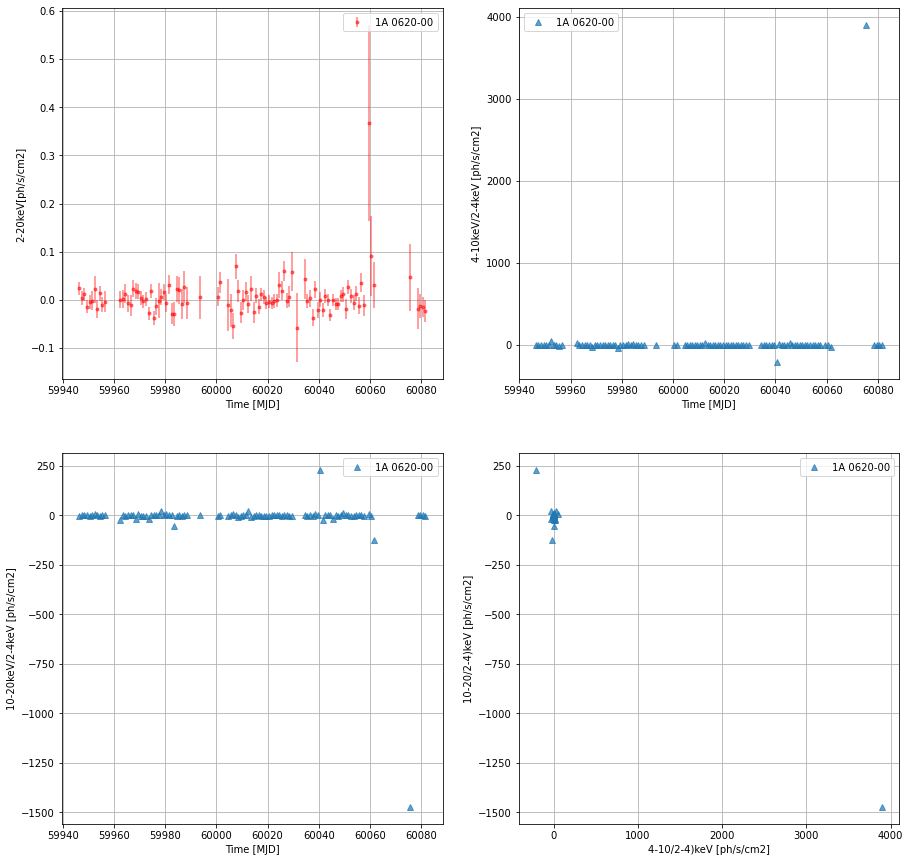

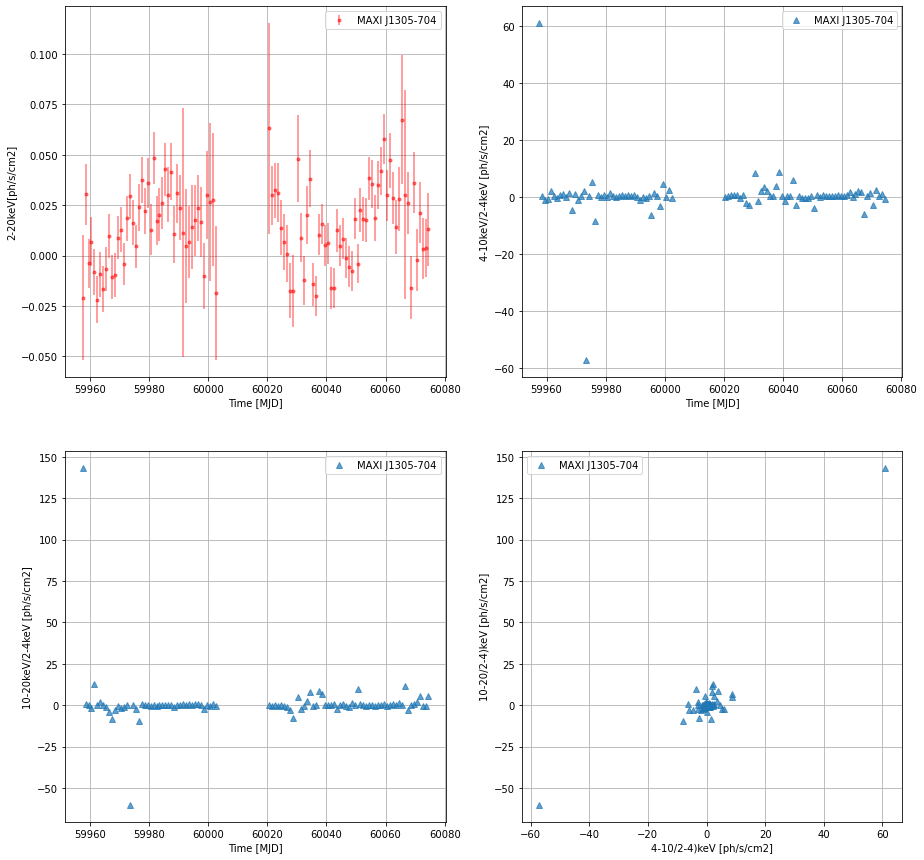

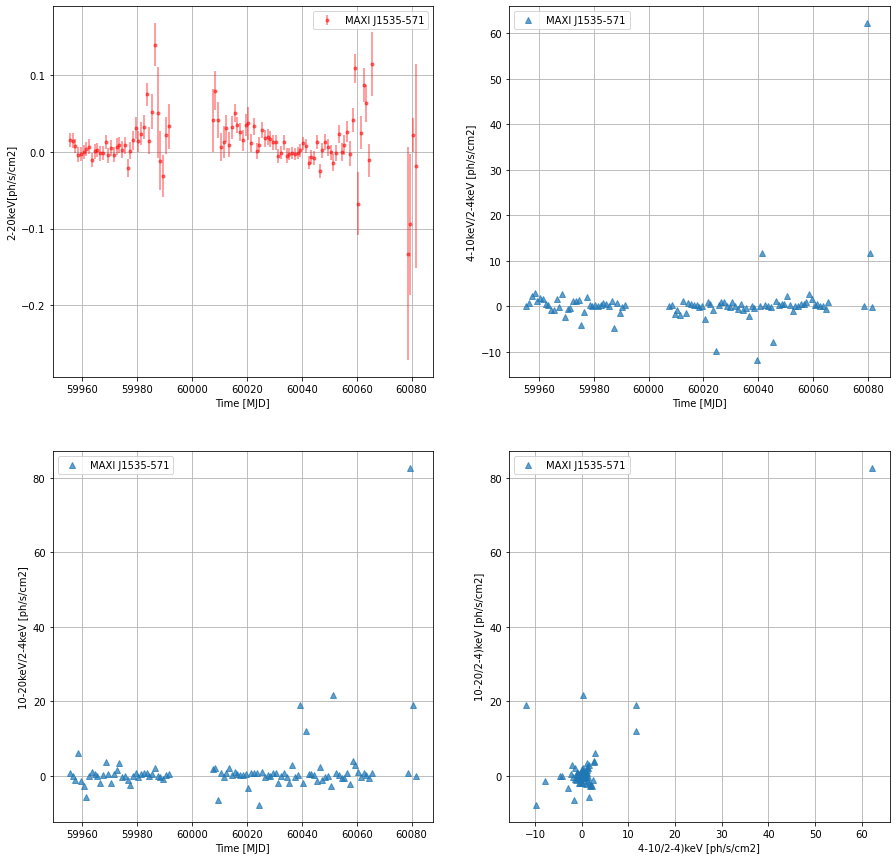

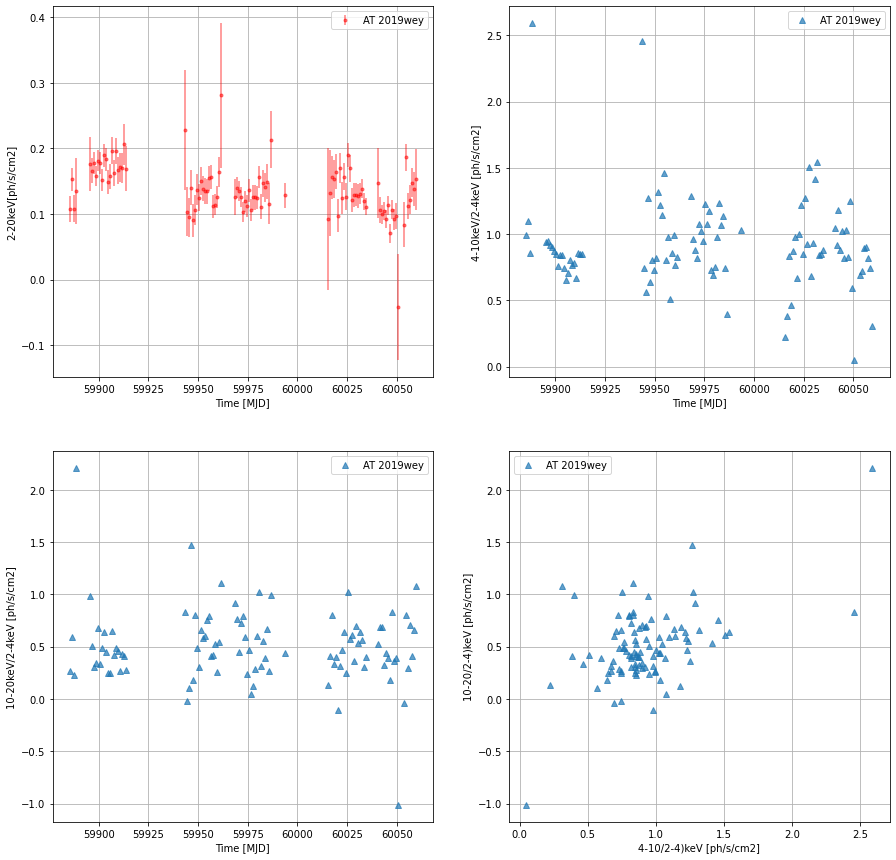

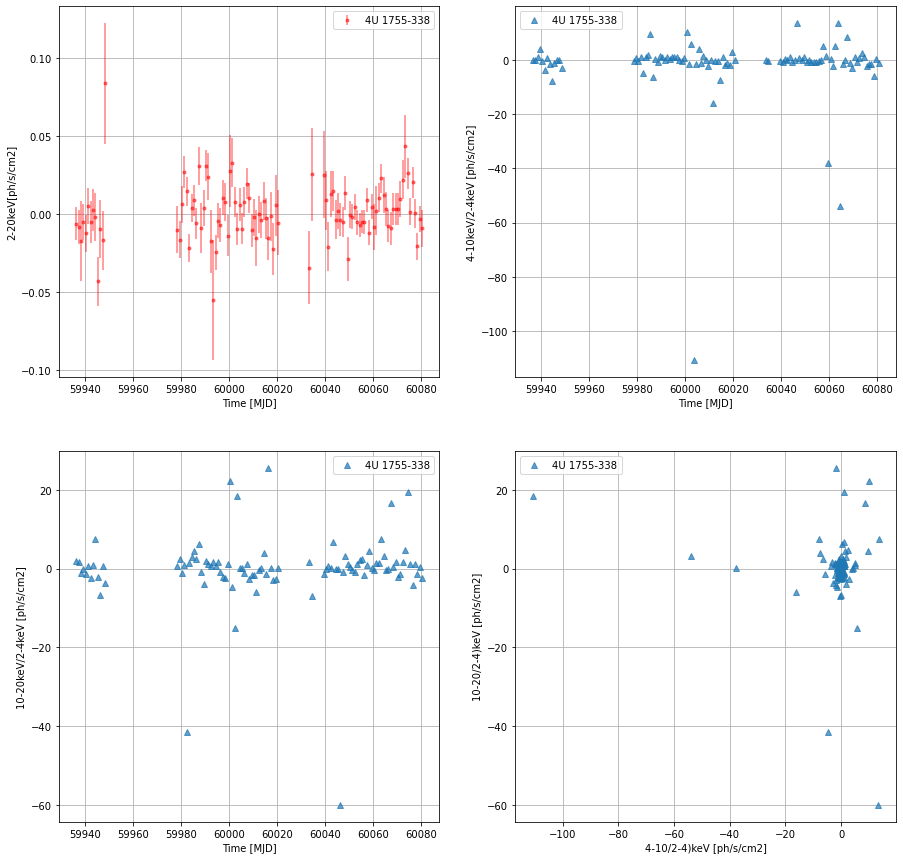

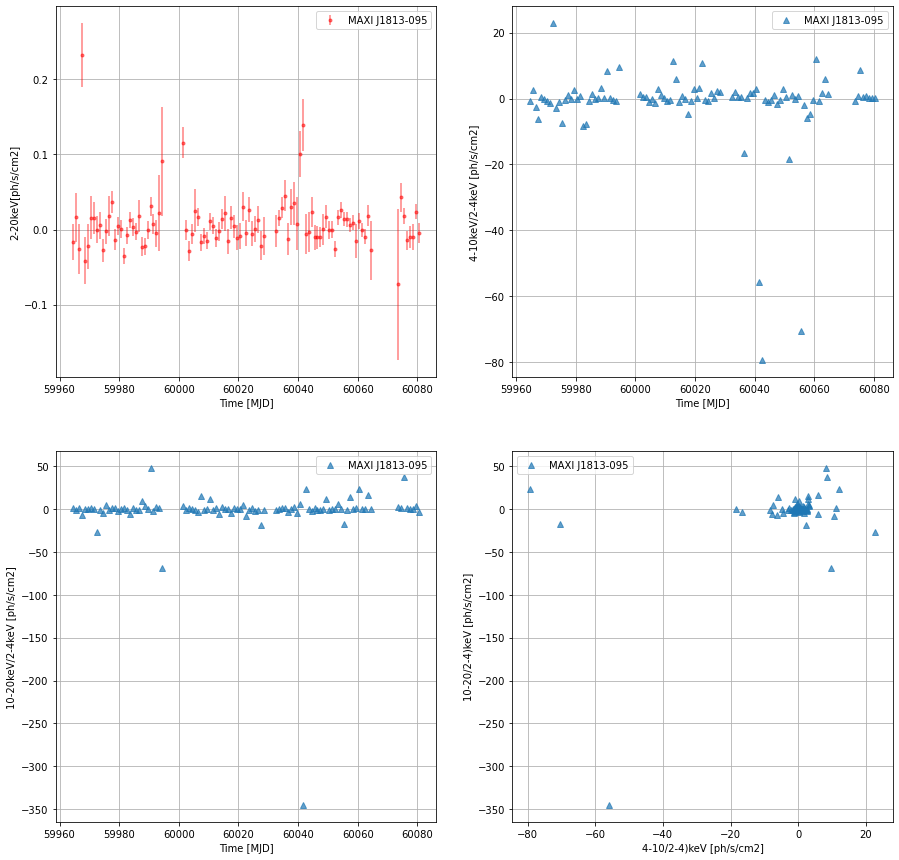

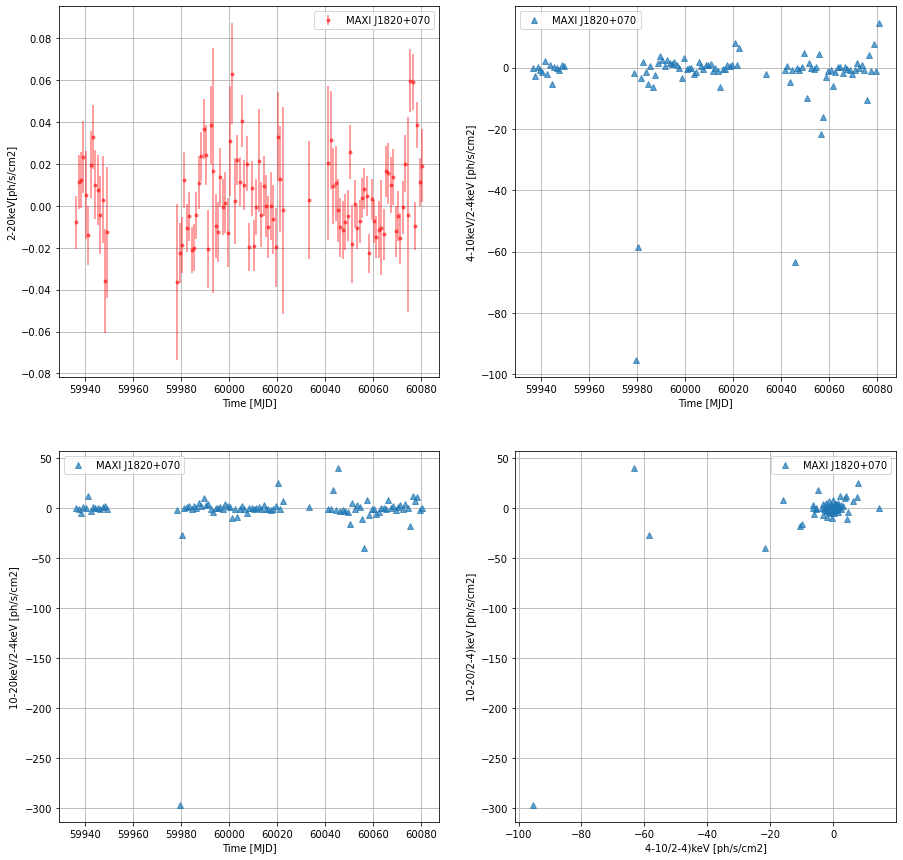

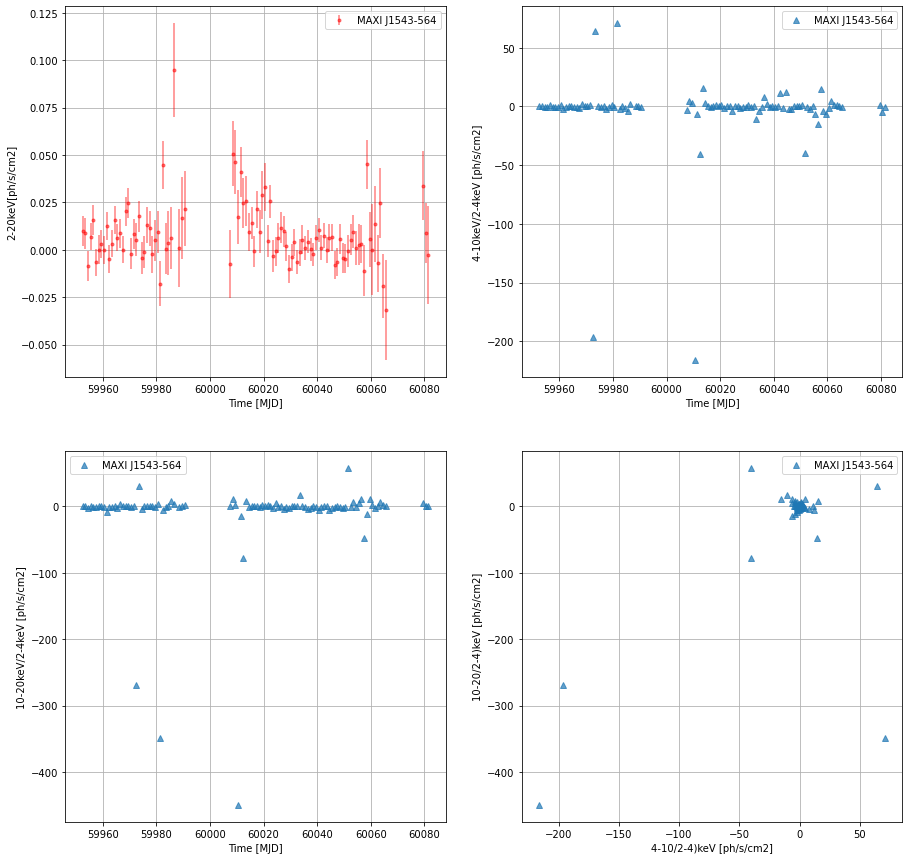

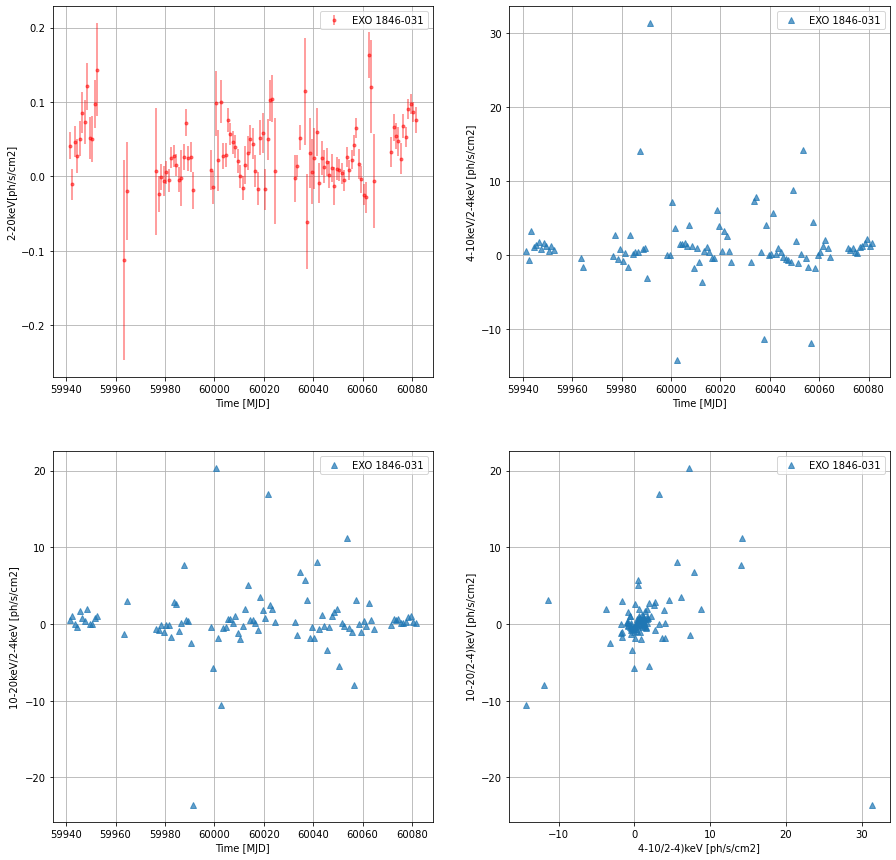

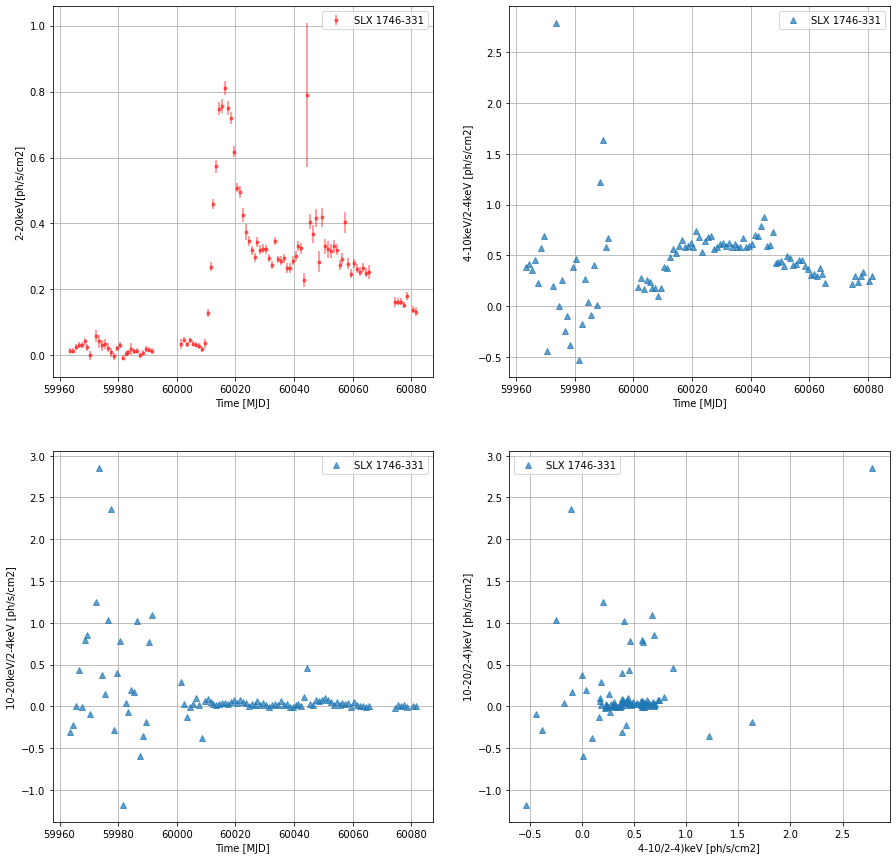

In [3]:
for file_name in csv_files:
    with open(file_name, 'r') as file:
        csvreader = csv.reader(file,delimiter="\t")
        for row in csvreader:
            col1_data = []
            col2_data = []
            col3_data = []
            col4_data = []
            col5_data = []
            col6_data = []
            col7_data = []
            col8_data = []
            col9_data = []
            # Loop through the rows in the CSV file
            for row in csvreader:
                col1_data.append(float(row[0]))
                col2_data.append(float(row[1]))
                col3_data.append(float(row[2]))
                col4_data.append(float(row[3]))
                col5_data.append(float(row[4]))
                col6_data.append(float(row[5])) 
                col7_data.append(float(row[6]))
                col8_data.append(float(row[7]))
                col9_data.append(float(row[8]))
                
                # Extract the file name without the extension
        file_label = os.path.splitext(file_name)[0]
# columns
        MJDcenter = np.array(col1_data)
        twotwentykeV = np.array(col2_data)
        error1 = np.array(col3_data)
        twofourkeV= np.array(col4_data)
        error2= np.array(col5_data)
        fourtenkeV= np.array(col6_data)
        error3= np.array(col7_data)
        tentwentykeV= np.array(col8_data)
        error4= np.array(col9_data)

        # error propagation for 4-10 keV / Time
        r_A1 = np.array(error3)/np.array(fourtenkeV)

        # similarly, the error associated with B
        r_B1= np.array(error2)/np.array(twofourkeV)

        div1=fourtenkeV/twofourkeV

        # error propagation
        fourtenvstwofour=(fourtenkeV/twofourkeV)*(r_A1+r_B1)

        # error associated with A
        r_A2 = np.array(error4)/np.array(tentwentykeV)

        # similarly, the error associated with B
        r_B2= np.array(error2)/np.array(twofourkeV)
        # error propagation
        tentwntyvstwofour=(tentwentykeV/twofourkeV)*(r_A2+r_B2)

        div2=tentwentykeV/twofourkeV
        
        
        #minimum
        # Calculate the minimum and maximum values of your data arrays
        x_min = min(np.min(MJDcenter), np.min(div1), np.min(div2))
        x_max = max(np.max(MJDcenter), np.max(div1), np.max(div2))
        y_min = min(np.min(twotwentykeV), np.min(div1), np.min(div2))
        y_max = max(np.max(twotwentykeV), np.max(div1), np.max(div2))
        
       # Calculate the indices for the last 100 points
        last_100_indices = range(len(MJDcenter) - 100, len(MJDcenter))
    
    # Extract the last 100 points
        last_100_MJDcenter = MJDcenter[last_100_indices]
        last_100_twotwentykeV = twotwentykeV[last_100_indices]
        last_100_error1 = error1[last_100_indices]
        last_100_div1 = div1[last_100_indices]
        last_100_div2 = div2[last_100_indices]
        
        
        #plotting the results 
        fig = plt.figure(figsize=(15, 15))
        plt.subplot(2, 2, 1)
        plt.title
        plt.errorbar(last_100_MJDcenter, last_100_twotwentykeV, yerr=last_100_error1, fmt='.r', alpha=0.5, label=file_label)
        plt.xlabel('Time [MJD]')
        plt.ylabel('2-20keV[ph/s/cm2]')
        plt.title('')
        plt.legend()
        plt.grid()
        plt.subplot(2, 2, 2)
        plt.plot(last_100_MJDcenter, last_100_div1, '^', alpha=0.7, label=file_label)
        plt.xlabel('Time [MJD]')
        plt.ylabel('4-10keV/2-4keV [ph/s/cm2]')
        plt.title('')
        #plt.errorbar(MJDcenter,fourtenvstwofour, yerr=error1, fmt='.k', alpha = 0.5);
        plt.legend()
        plt.grid()
        plt.subplot(2, 2, 3)
        plt.plot(last_100_MJDcenter, last_100_div2, '^', alpha=0.7, label=file_label)
        plt.xlabel('Time [MJD]')
        plt.ylabel('10-20keV/2-4keV [ph/s/cm2]')
        plt.title('')
        plt.legend()
        plt.grid()
        plt.subplot(2, 2, 4)
        plt.plot(last_100_div1, last_100_div2, '^', alpha=0.7, label=file_label)
        plt.xlabel('4-10/2-4)keV [ph/s/cm2]')
        plt.ylabel('10-20/2-4)keV [ph/s/cm2]')
        plt.title('')
        plt.legend()
        plt.grid()
       # plt.savefig('catalog_variability.pdf',dpi=1000)
        plt.show()


    